# Выявление определяющих успешность игры закономерностей для интернет-магазина «Стримчик»

## Введение

Целью данного исследования является выявление определяющих успешность игры закономерностей для интернет-магазина «Стримчик» с целью дальнейшего определения потенциально популярного продукта и планирования успешных компаний. Для анализа будут использованы исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) из открытых источников. Данные представлены до 2016 года (данные за 2016 год могут быть представлены не полностью), исследование проводится с целью получения информации для планирование кампании на 2017-й год.

Исследование построено следующим образом:

* Глава 2 посвящена подготовке к анализу: загрузке необходимых библиотек, датафрейма, проведению первичного анализа и обработке  данных.
* В Главе 3 будет проведён исследовательский анализ данных: 
    * Проведён анализ, как выпускались игры в разные годы и как менялись продажи в зависимости от платформы с целью определения актуального периода для данного исследования;
    * Определены потенциально прибыльные платформы, для которых будут построены ящики "с усами" для более детального анализа;
    * Определена зависимость (или её отсутствие) между продажами и отзывами пользователей, а также между продажами и отзывами критиков;
    * Будет представлено распределение игр по жанрам с целью определения самых прибыльных из них.
* В Главе 4 будет построен портрет пользователя каждого из трёх представленных в исследовании регионов: европейского, северо-американского и японского;
* Глава 5 будет посвящена проверке двух гипотез;
* Наконец, в Главе 6 будут сделаны выводы и подведены итоги исследования.

## Подготовка к анализу

Подготовка к анализу включает в себя загрузку необходимых библиотек, датафрейма, проведение первичного анализа данных.

Загрузка библиотек и файла с данными (название файла - games):

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.2f}'.format

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Создание универсальной функции для анализа датасетов:

In [3]:
def first_analysis(data):
    print(data.shape)
    data.info()
    display(data.describe())
    display(data.head())
    print(data.duplicated().sum())

In [4]:
first_analysis(games)

(16715, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


0


В датафрейме 16715 строк и 11 столбцов: 
    
* Name — название игры;
* Platform — платформа;
* Year_of_Release — год выпуска;
* Genre — жанр игры;
* NA_sales — продажи в Северной Америке (миллионы проданных копий);
* EU_sales — продажи в Европе (миллионы проданных копий);
* JP_sales — продажи в Японии (миллионы проданных копий);
* Other_sales — продажи в других странах (миллионы проданных копий);
* Critic_Score — оценка критиков (максимум 100);
* User_Score — оценка пользователей (максимум 10);
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Дубликатов нет. Есть пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating. Наличие пропусков может быть связано с тем, что информация бралась из открытых источников, и не везде могла была представлена полностью. Также возможны ошибки сотрудников компании при добыче и/или переносе и обработке информации, а также технические сбои во время этих процессов.

Поскольку целью исследования является выявление определяющих успешность игры закономерности, а каждая игра - это уникальный кастомизированный продукт, заполнение пропусков некими "усреднёнными значениями" является нежелательным, так как это может привести к сильному искажению данных и, как следствие, к невалидности результатов исследования. В целях получения максимально точных результатов для дальнейших предсказаний пропуски будут оставлены как есть.

Названия столбцов необходимо привести к нижнему регистру. 

In [5]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Полных дубликатов нет, но могут быть неявные. Проще всего проверить это по названиям игр:

In [6]:
games['name'].duplicated().sum()

5155

Неявные дубликаты будут найдены с помощью сравнения данных из ключевых столбцов name, platform, year_of_release. 

In [7]:
games= games.drop_duplicates(subset=['name','platform', 'year_of_release'],
                             keep='first')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Из датафрейма были удалены 2 неявных дубликата.

Также будут рассмотрены игры без названия, такая игра должна быть одна в датафрейме.

In [8]:
no_name = games[games['name'].isnull()]
no_name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


Так и есть - игру можно удалить, так как, помимо названия, у неё отсутствуют ещё жанр, оценка критиков, оценка игроков и рейтинг.

In [9]:
games = games.drop(index = 659)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Строка с данными успешно удалена.
Для дальнейшей работы с данными полезно взглянуть на уникальные значения каждого из столбцов. 

In [10]:
for col in games.columns:
    print(games[col].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.060e+00 3.430e+00 5.510e+00
 6.850e+00 9.040e+00 5.890e

Столбец Name, содержащий названия игр, может быть проигнорирован ввиду того, что названий игр существует великое множество. 
В первую очередь интересны остальные столбцы, особенно наличие либо отсутствие не одинаковых, но близких названий в категориальных столбцах, а также наличие аномальных значений в количественных.

Анализ показал, что максимально схожих названий в категориальных столбцах нет. Заметных аномальных значений также не наблюдается. Зато есть пропуски, о которых уже говорилось ранее, а также наличие не числовых значений 'tbd' (To Be Determined - означает, что оценка пользователей ещё не определена) в столбце user_score, что на данном этапе мешает проведению исследования. 

Так как аномалий и неявных дубликатов не наблюдается, а пропуски решено оставить как есть, можно переходить к смене типов данных в соответствующих столбцах, а также решению проблемы со значением 'tbd'.

Сначала будет рассмотрен столбец  year_of_release. Данные в столбце желательно изменить c float64 на int, так как столбец содержит данные о годах. Однако ситуация осложнена тем, что в столбце встречаются пропущенные значения NaN, что исключает возможность простой смены типа данных. Всего их 269.

In [11]:
games['year_of_release'].isna().sum()

269

Одним из рабочих вариантов является заполнение пропусков числовыми значениями, например, средним арифметическим либо 0, с последующей сменой типа данных. Но, как уже упоминалось ранее, такое решение приведёт к искажению данных в столбце, таких как медиана, среднее арифметическое, минимальное значение и т.д. Так как смена типа данных несёт в данном случае эстетическую, а не практическую роль (наличие двух знаков после запятой в значениях годов), было принято решение оставить тип данных как есть, так как правдивость результатов анализа превуалирует над красотой формы. 

Второй спорный столбец - user_score. Данные в нём необходимо изменить c object на float64, так как столбец должен содержать числовые значения. Однако смена типа данных в данном столбце также осложнена. В столбце присутствуют не числовые значения.

In [12]:
games[games['user_score'] == 'tbd']['name'].count()

2424

Как и в случае со столбцом с годом выхода, использование средних значений либо 0 нежелательно, так как приведёт к искажению данных. В данном случае выражения 'tdp' будет заменено на пустое значение, после чего будет произведена смена данных. 

In [13]:
games['user_score'] =  games['user_score'].replace('tdp', np.nan)
games['user_score']= pd.to_numeric(games['user_score'], errors='coerce') 
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [14]:
games[games['user_score'] == 'tbd']['name'].count()

0

Смена данных столбца user_score успешно произведена.

Следующий шаг - изучение рейтингов и количества игр по ним:

In [15]:
games_ratings = games.groupby('rating').count()['name'].sort_values(ascending = False)
games_ratings

rating
E       3989
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: name, dtype: int64

Четыре рейтинга встречаются крайне мало и будут удалены (только названия рейтигов, строки с играми останутся в датасете). Для получения более объективной картины при анализе рейтингов все пропуски в колонке rating будут заполнены значением единым значением 'unknown', что позволит проанализировать данные тех пользователей, у которых информации по рейтингу нет.

In [16]:
games['rating'] = games['rating'].replace('EC', '').replace('K-A', '').replace('RP', '').replace('AO', '').replace('', 
                  'unknown').fillna('unknown')
games['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+'], dtype=object)

In [17]:
games_ratings = games.groupby('rating').count()['name'].sort_values(ascending = False)
games_ratings

rating
unknown    6779
E          3989
T          2961
M          1563
E10+       1420
Name: name, dtype: int64

Финальный этап предобработки данных - добавление нового столбца с суммарными продажами во всех регионах, необходимые для продолжения исследования.

In [18]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Подведение итогов:

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16712 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


Новый столбец успешно добавлен, тип данных правильный. Предобработка данных завершена.

## Исследовательский анализ данных

Исследовательский анализ будет состоять из нескольких раздельных глав.

### Выход игр по годам

Первый этап анализа - изучение выхода игр по годам:

In [20]:
games_per_year = games.groupby('year_of_release')['name'].count().reset_index()
games_per_year.columns = ['year_of_release', 'amount_of_games']
games_per_year

,year_of_release,amount_of_games
0,1980.00,9
1,1981.00,46
2,1982.00,36
3,1983.00,17
4,1984.00,14
5,1985.00,14
6,1986.00,21
7,1987.00,16
8,1988.00,15
9,1989.00,17


Сортировка лет по количеству вышедших игр:

In [21]:
games_per_year.sort_values(by ='amount_of_games', ascending = False)

,year_of_release,amount_of_games
28,2008.00,1427
29,2009.00,1426
30,2010.00,1255
27,2007.00,1197
31,2011.00,1136
26,2006.00,1006
25,2005.00,939
22,2002.00,829
23,2003.00,775
24,2004.00,762


Построение графика:

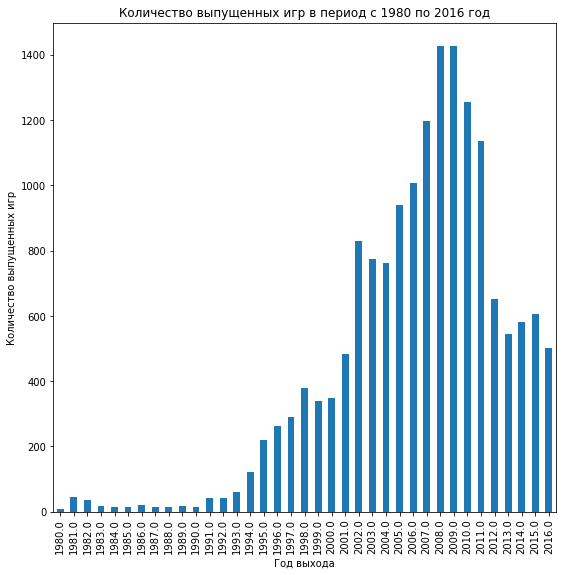

In [22]:
games_per_year.plot(figsize=(9,9), title = 'Количество выпущенных игр в период с 1980 по 2016 год', x = 'year_of_release', 
                    y = 'amount_of_games', xlabel = 'Год выхода', ylabel= 'Количество выпущенных игр', legend = False, 
                    kind='bar');

In [23]:
games_per_year[:2]

,year_of_release,amount_of_games
0,1980.00,9
1,1981.00,46


Пик выхода игр пришёлся на период 2007-2011, когда каждый год выходило более чем по 1000 игр. Вплоть до 1994 года игр выходило крайне мало, не более 121 за год, после чего количество выпускаемых каждый год игр начало сильно расти. Самый заметный скачок произошёл между 2001 и 2022 годами, когда за год количество выпущенных игр увеличилось более чем в 1,7 раза (482 против 829 игр). Однако также заметен и сильный спад после 2011 года - в 2012 году вышло всего 653 игр против 1136 годом ранее, что означает сокращение более чем в те же 1,7 раза.

Данные вплоть до 1995 года включают в себя лишь 2,9% от общего количества вышедших за это время игр.

In [25]:
games_per_year[games_per_year['year_of_release']< 1995.00]['amount_of_games'].sum()

486

In [26]:
486/16715*100

2.907568052647323

### Изменение продаж по платформам

Также будет проанализировано, как менялись продажи в зависимости от платформы. Для начала будут отобраны ТОП-5 платформ с наибольшими суммарными продажами и построены их распределения по годам. После этого будет проанализировано, за какой характерный срок появляются новые и исчезают старые платформы.

Определение топовых платформ:

In [27]:
games_per_platform = games.groupby('platform')['total_sales'].sum().reset_index()
games_per_platform.sort_values(by = 'total_sales', ascending = False)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.64
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


ТОП-5 платформ данной выборки с наибольшими суммарными продажами (в миллионах проданных копий):

* PS2 -	1255.77;
* X360 - 971.42;
* PS3 - 939.65;
* Wii -	907.51;
* DS  - 806.12.

Создание отдельных датафреймов по каждой из пяти популярных платформ для графиков:

In [28]:
games_per_top_platform = pd.pivot_table(games,
                                        index='year_of_release', 
                                        columns='platform',
                                        values = 'total_sales',
                                        aggfunc= 'sum')
games_per_top_platform = games_per_top_platform[['PS2', 'X360', 'PS3', 'Wii', 'DS']]
games_per_top_platform 

platform,PS2,X360,PS3,Wii,DS
year_of_release,,,,,
1980.00,NaN,NaN,NaN,NaN,NaN
1981.00,NaN,NaN,NaN,NaN,NaN
1982.00,NaN,NaN,NaN,NaN,NaN
1983.00,NaN,NaN,NaN,NaN,NaN
1984.00,NaN,NaN,NaN,NaN,NaN
1985.00,NaN,NaN,NaN,NaN,0.02
1986.00,NaN,NaN,NaN,NaN,NaN
1987.00,NaN,NaN,NaN,NaN,NaN
1988.00,NaN,NaN,NaN,NaN,NaN


У DS есть странное значение в 1985 году - при том, что далее вплоть до 2004 года никаких значений не упоминается.

Официальной датой релиза DS считается 21 ноября 2004 года, соответственно, в данных допущена ошибка, и никаких продаж в 1985 у игр данной платформы быть не могло.

Так как никаких продаж у популярных платформ до 2000 не было, сводная таблица будет сокращена:

In [29]:
games_per_top_platform = games_per_top_platform.query('year_of_release > 1999')
games_per_top_platform

platform,PS2,X360,PS3,Wii,DS
year_of_release,,,,,
2000.00,39.17,NaN,NaN,NaN,NaN
2001.00,166.43,NaN,NaN,NaN,NaN
2002.00,205.38,NaN,NaN,NaN,NaN
2003.00,184.31,NaN,NaN,NaN,NaN
2004.00,211.81,NaN,NaN,NaN,17.27
2005.00,160.66,8.25,NaN,NaN,130.14
2006.00,103.42,51.62,20.96,137.15,119.81
2007.00,75.99,95.41,73.19,152.77,146.94
2008.00,53.90,135.26,118.52,171.32,145.31


Но ошибку с DS нужно исправить и в основном датафрейме.
Найти игры с ошибкой:

In [30]:
fake_sales = games[(games['year_of_release'] == 1985) & (games['platform'] == 'DS') & (games['total_sales'] > 0)] 
fake_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.00,Action,0.00,0.00,0.02,0.00,NaN,NaN,unknown,0.02


По данной игре данных практически нет, её можно удалить из датасета.

In [31]:
games = games.drop(index = 15957)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16442 non-null  float64
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16711 non-null  object 
 11  total_sales      16711 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


Строка успешно удалена.

Графики для ТОП-5 платформ по продажам:

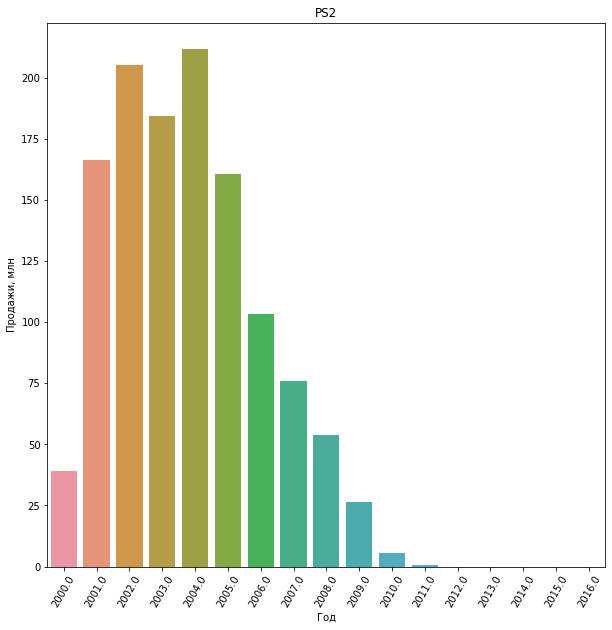

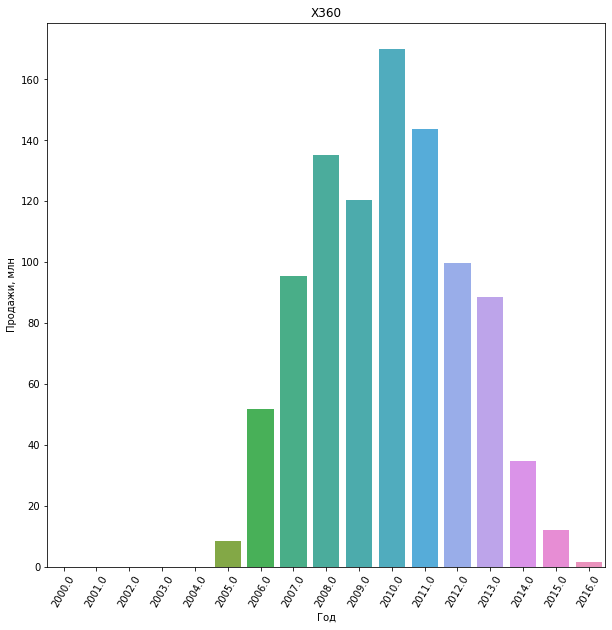

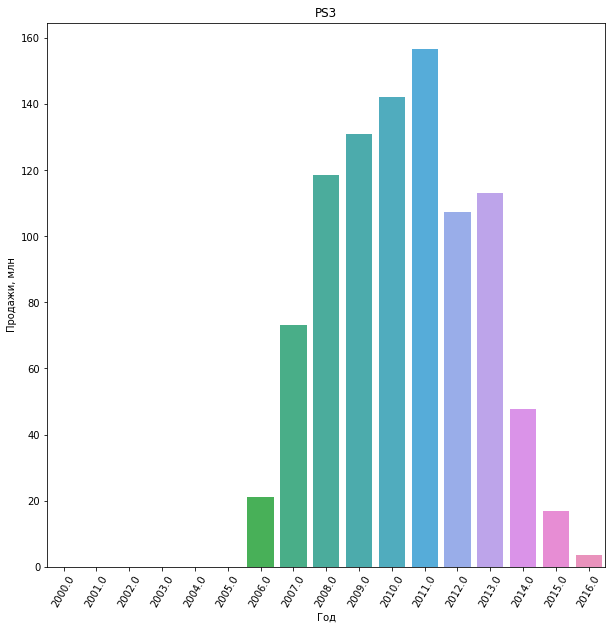

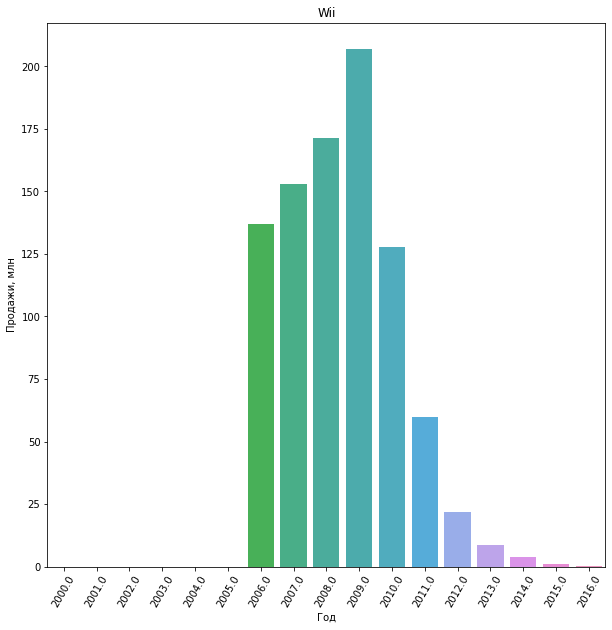

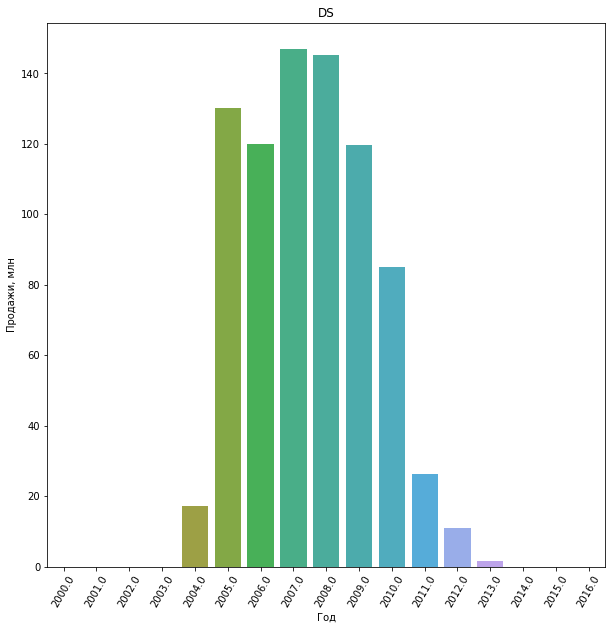

In [32]:
for col in games_per_top_platform.columns:
    plt.figure(figsize=(10, 10))
    sns.barplot(x = games_per_top_platform .index, y = col, data = games_per_top_platform )
    plt.xlabel("Год")
    plt.ylabel("Продажи, млн")
    plt.title(col)
    plt.xticks(rotation=60)
    plt.show()

Построение графиков:

Несмотря на разные годы расцвета платформ и разную динамику их развития, можно наблюдать следующие закономерности:
* Приблизительная "продолжительность жизни" каждой платформы - 9-10 лет. 
* Для "цикла" характерен рост в первые годы "жизни", который длится от 4 до 6 лет, достигая в итоге своего пика, после чего показатели начинают падать, пока "цикл" не закончится на 9-10 году "жизни".

### Определение актуального периода

В результате исследования предыдущих вопросов будет определён актуальный период. Так как основным фактором является тот факт, что отобранные данные должны помочь построить прогноз на 2017 год, логично взять данные за последние годы, включая 2016 год. Вопрос состоит лишь в том, с какого года отсечь данные для данного исследования.

После анализа полученных ранее результатов было решено определить актуальный период с 2014 по 2016 гг. по следующим причинам:
* Компьютерные игры - очень динамично меняющаяся индустрия, для которой события трёхлетней давности уже становятся неактуальными;
* Период в 3 года не захватывает "жизненный цикл" популярных платформ целиком, из чего можно предполагать, что популярные за последние 3 года платформы в следующем году свой "жизненный цикл" не закончат.

Данные до 2013 года включительно будут удалены из датасета для дальнейшей работы.

In [33]:
games_actual = games.query('year_of_release > 2013')
first_analysis(games_actual)

(1689, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 171.5+ KB


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1689.00,1689.00,1689.00,1689.00,1689.00,718.00,888.00,1689.00
mean,2014.95,0.17,0.16,0.06,0.05,72.31,6.62,0.43
std,0.80,0.45,0.47,0.21,0.14,12.21,1.59,1.06
min,2014.00,0.00,0.00,0.00,0.00,19.00,0.20,0.01
25%,2014.00,0.00,0.00,0.00,0.00,66.00,5.80,0.03
50%,2015.00,0.02,0.02,0.01,0.01,74.00,7.00,0.10
75%,2016.00,0.12,0.12,0.04,0.04,81.00,7.80,0.35
max,2016.00,6.03,6.31,3.18,2.38,97.00,9.30,14.63


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.00,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.00,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.00,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015.00,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.00,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


0


In [34]:
sorted(games_actual['year_of_release'].unique())

[2014.0, 2015.0, 2016.0]

Датафрейм создан правильно. В нём осталось 1689 из 16715 строк, что составляет 10.1% от прошлого датасета. В дальнейших главах исследования вплоть до Главы 4 (Портрет пользователя) будет использоваться только новый датафрейм.

In [35]:
1689/16715*100

10.10469638049656

### Определение потенциально прибыльных платформ

Следующий шаг - определить потенциально прибыльные платформы, используя только данные актуального периода.

In [36]:
games_actual_per_platform = games.groupby('platform')['total_sales'].sum().reset_index().sort_values(by = 'total_sales', 
                                                                                                     ascending = False) 
games_actual_per_platform

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.64
26,Wii,907.51
4,DS,806.10
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


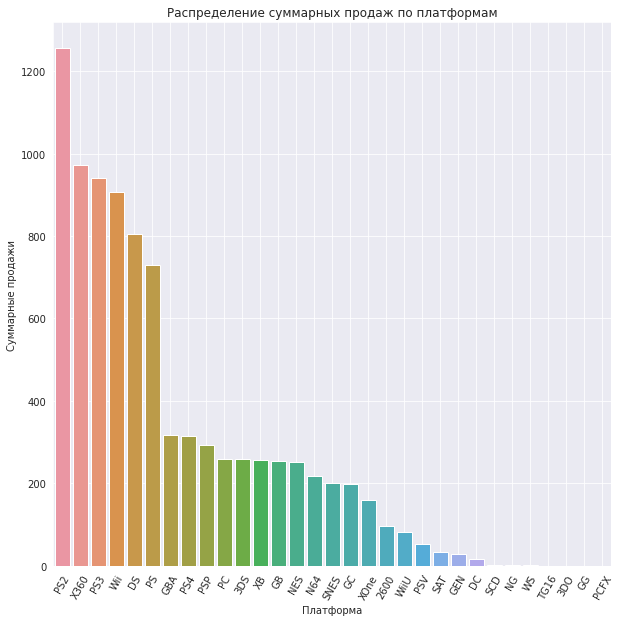

In [38]:
sns.set_style('dark')
plt.figure(figsize=(10, 10))
sns.barplot(x = 'platform', y = 'total_sales', data = games_actual_per_platform)
plt.title('Распределение суммарных продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=60)
plt.grid()
plt.show()

Несмотря на сокращение выборки почти в пять раз, с сильным отрывом всё ещё лидируют ранее упомянутые ТОП-5 платформ: PS2, X360, PS3, Wii, DS, а также PS. Однако стоит учитывать, что неизвестно, на каком этапе "жизненного цикла" находится каждая платформа. Логично предположить, что платформы из данного ТОПа могли уже войти в фазу своего угасания, предварительно продавшись миллионами копий по всему миру в свои "золотые годы". Поэтому, помимо итоговых значений, необходимо также отследить динамику.

Для всех платформ будет создана сводная таблица с разбивкой по годам, а также построены графики.

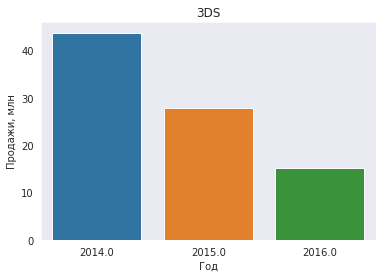

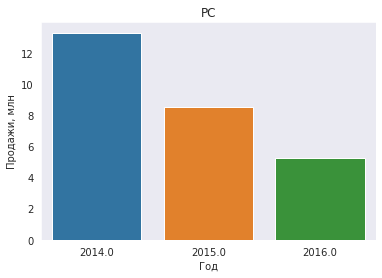

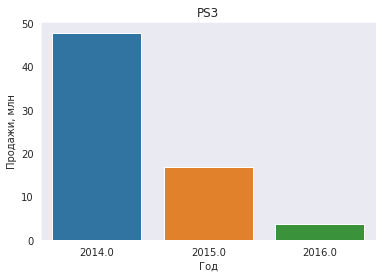

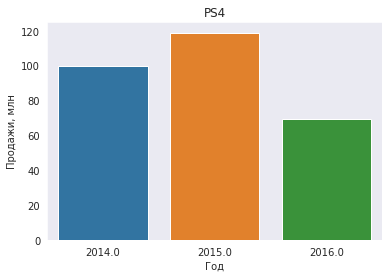

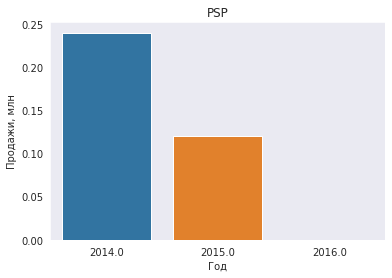

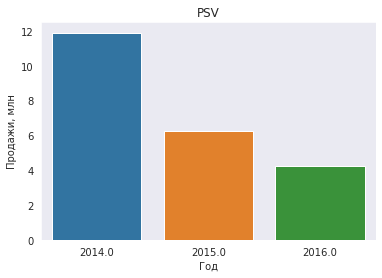

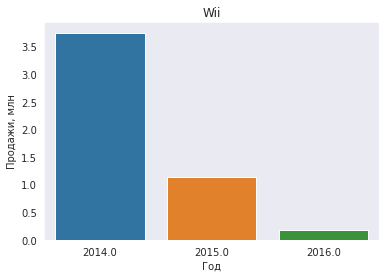

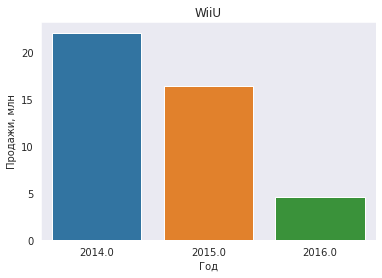

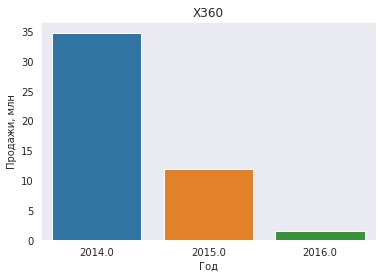

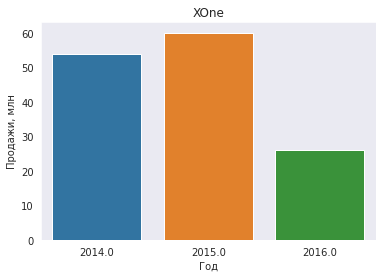

In [39]:
games_actual_plat_rising = pd.pivot_table(games_actual,
                                          index='year_of_release', 
                                          columns='platform', 
                                          values = 'total_sales', 
                                          aggfunc='sum')

for col in games_actual_plat_rising.columns:
    sns.barplot(x = games_actual_plat_rising.index, y = col, data = games_actual_plat_rising)
    plt.xlabel("Год")
    plt.ylabel("Продажи, млн")
    plt.title(col)
    plt.show()

Графики наглядно показывают, какие платформы за период с 2012 по 2016 переживают лучшие времена, а какие уже "доживают" последние годы своего "жизненного цикла". 

Так, продажи падают у :
* 3DS
* DS (у которой с 2014 года продаж вообще нет)
* PC
* PS3
* PSP
* PSV
* Wii
* X360

В целом можно сказать, что рынок видеоигр переживает не лучшие времена. Однако есть несколько перспективных платформ, у которых неплохие показатели, не считая последнего, 2016 года, данные за который могли быть представлены не полностью. Такими являются:
* PS4
* X-One
* WiiU 

Ещё три платформы, судя по графиками, уже прошли свои пиковые значения, но всё равно продолжают показывать в последние годы хорошие результаты в абсолютном выражении. Это:
* 3DS
* PC
* PSV

В настоящий момент непонятно, является ли "провальный" 2016 год у данных платформ причиной отсутствия данных в датасете, или же платформы объективно стали менее популярными. Однако именно эти платформы показывают лучшие результаты в датасете, и поэтому они определены в рамках данного исследования как потенциально прибыльные платформы.

Для дальнейшего исследования будут созданы отдельные датафреймы для всех 6 потенциально прибыльных платформ.

In [40]:
games_actual_ps4 = games_actual.query('platform == "PS4"')
games_actual_xone = games_actual.query('platform == "XOne"')
games_actual_wiiU = games_actual.query('platform == "WiiU"')
games_actual_3ds = games_actual.query('platform == "3DS"')
games_actual_pc = games_actual.query('platform == "PC"')
games_actual_psv = games_actual.query('platform == "PSV"')

Проверка:

In [41]:
games_actual_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.00,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.00,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
77,FIFA 16,PS4,2015.00,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.00,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.00,Shooter,2.81,3.48,0.14,1.23,83.00,5.70,M,7.66


In [42]:
games_actual_ps4['platform'].unique()

array(['PS4'], dtype=object)

Датасеты созданы правильно.

### Построение ящика "с усами"

Следующий этап - построение графика «ящик с "усами"» по глобальным продажам игр с разбивкой по топовым платформам. 

Создание датафрейма с играми, вышедшими для топовых платформ:

In [43]:
games_actual_per_top_platform = games_actual[(games_actual['platform'] == 'PS4') | (games_actual['platform'] == 'XOne') | 
                                             (games_actual['platform'] == 'WiiU')| (games_actual['platform'] == '3DS') |
                                             (games_actual['platform'] == 'PC')  | (games_actual['platform'] == 'PSV')]
games_actual_per_top_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.00,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.00,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.00,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015.00,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.00,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16703,Strawberry Nauts,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014.00,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [44]:
games_actual_per_top_platform['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV'], dtype=object)

Датасет создан правильно, можно строить ящики "с усами". Сначала будут построены графики в масштабе 100%:

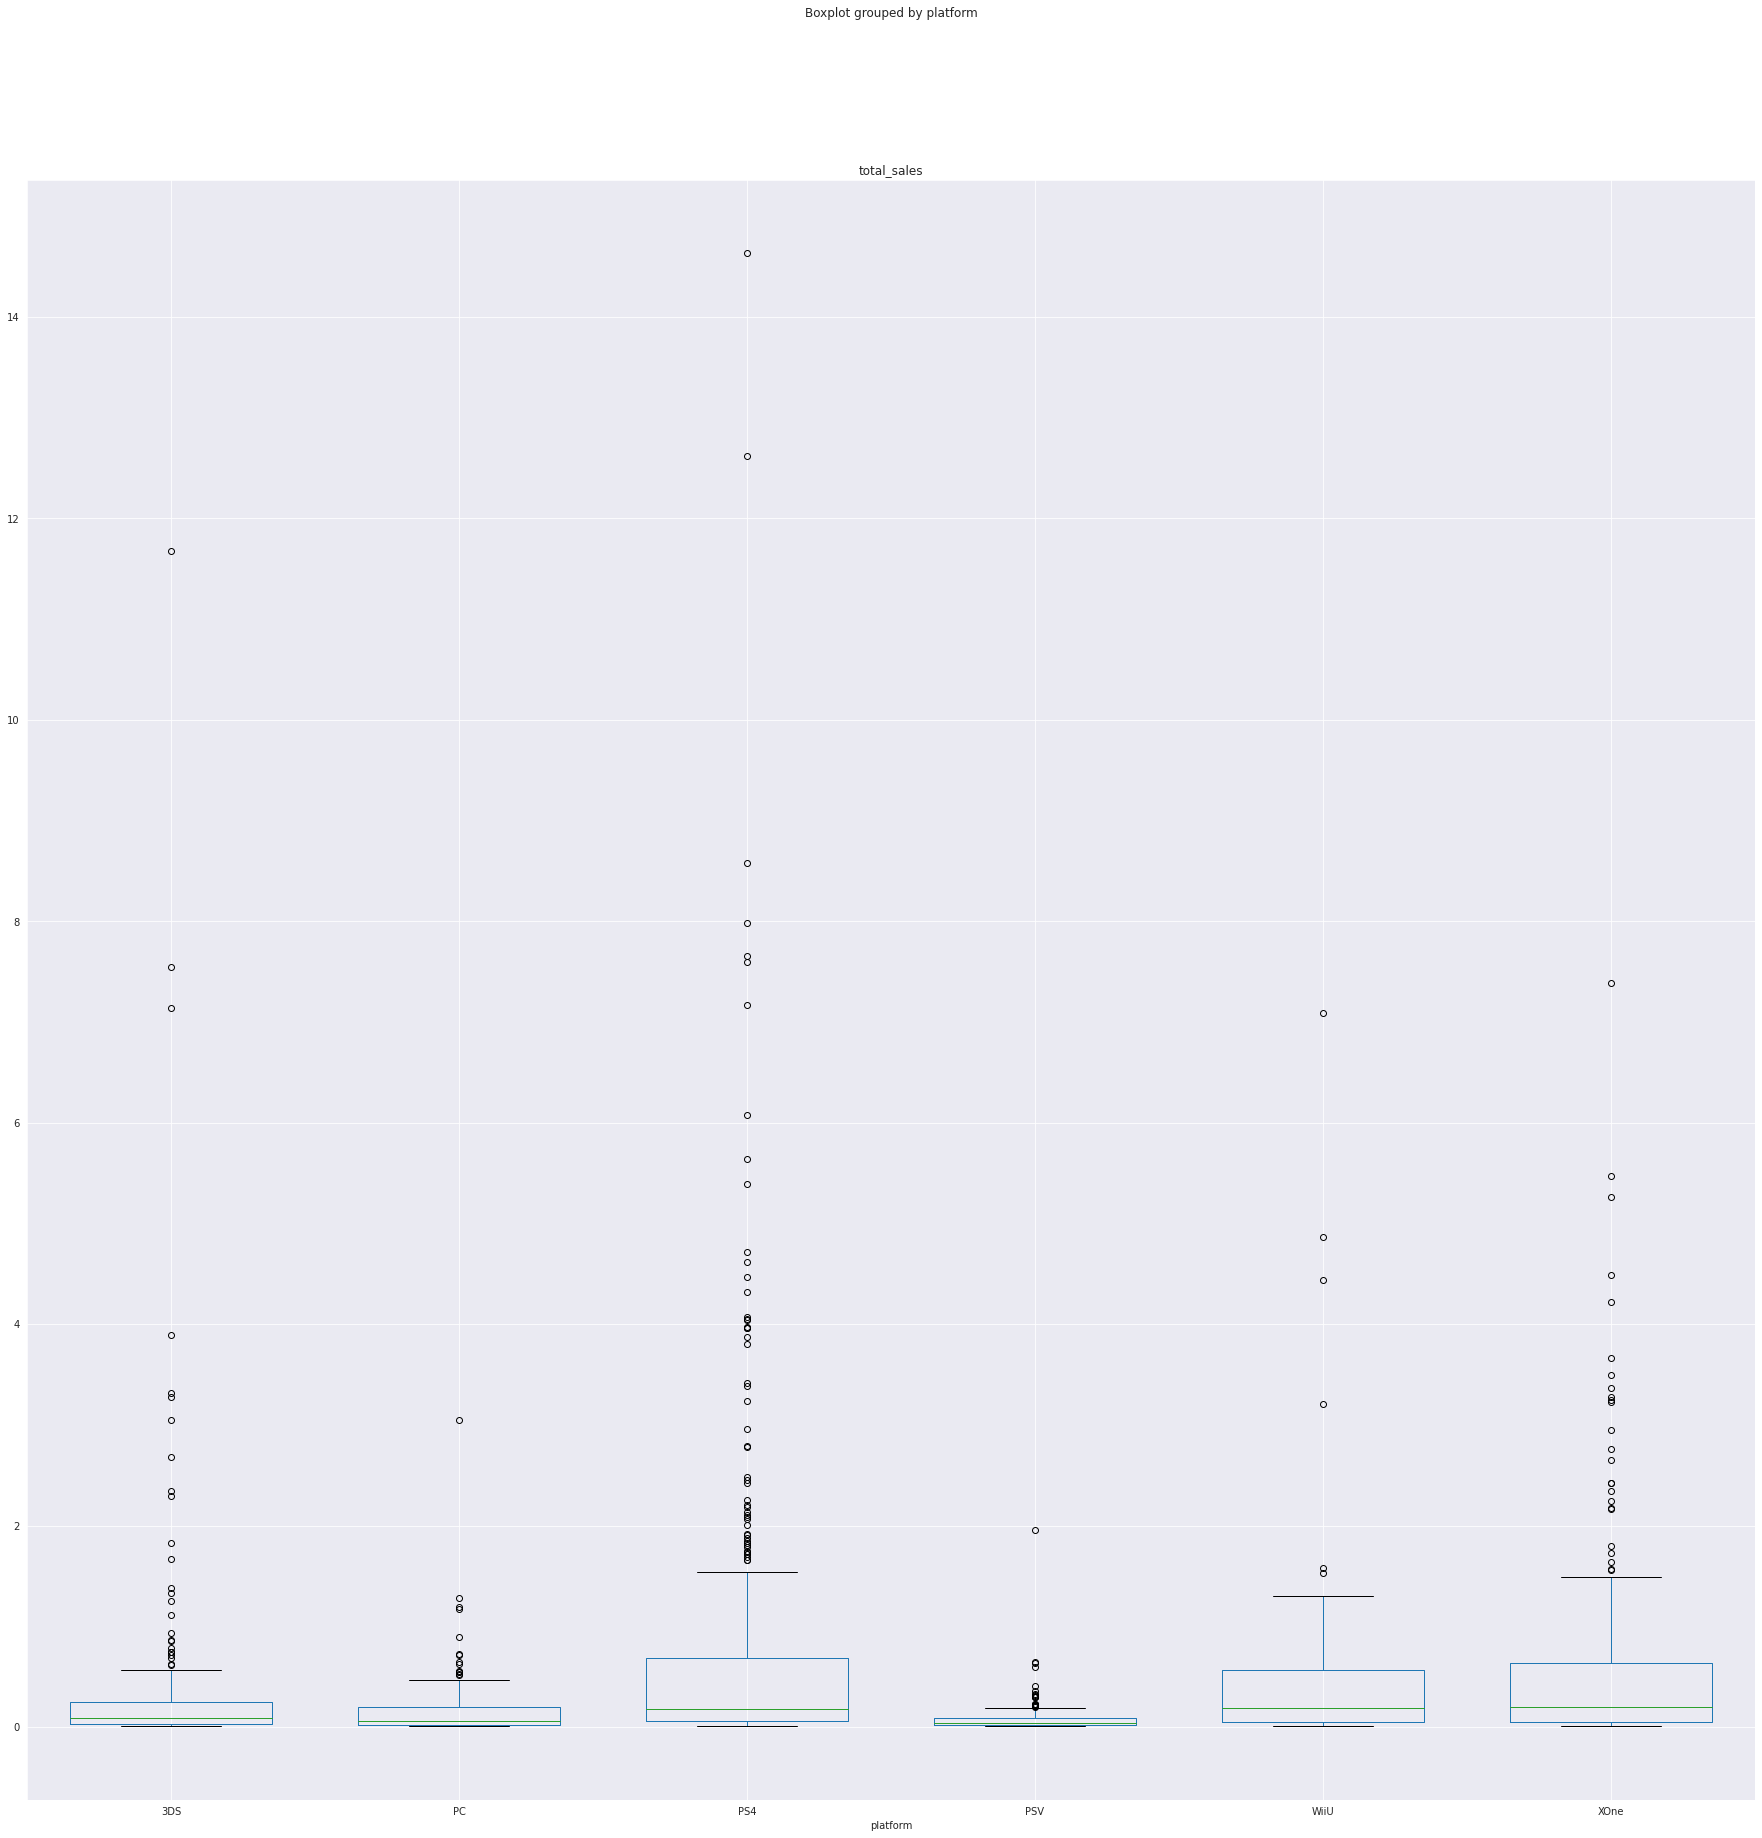

In [45]:
games_actual_per_top_platform.boxplot(column = 'total_sales', widths=0.7, by = 'platform', figsize = (30,30));

И отдельно - с отображением только нижней части boxplot'a:

(0.0, 2.0)

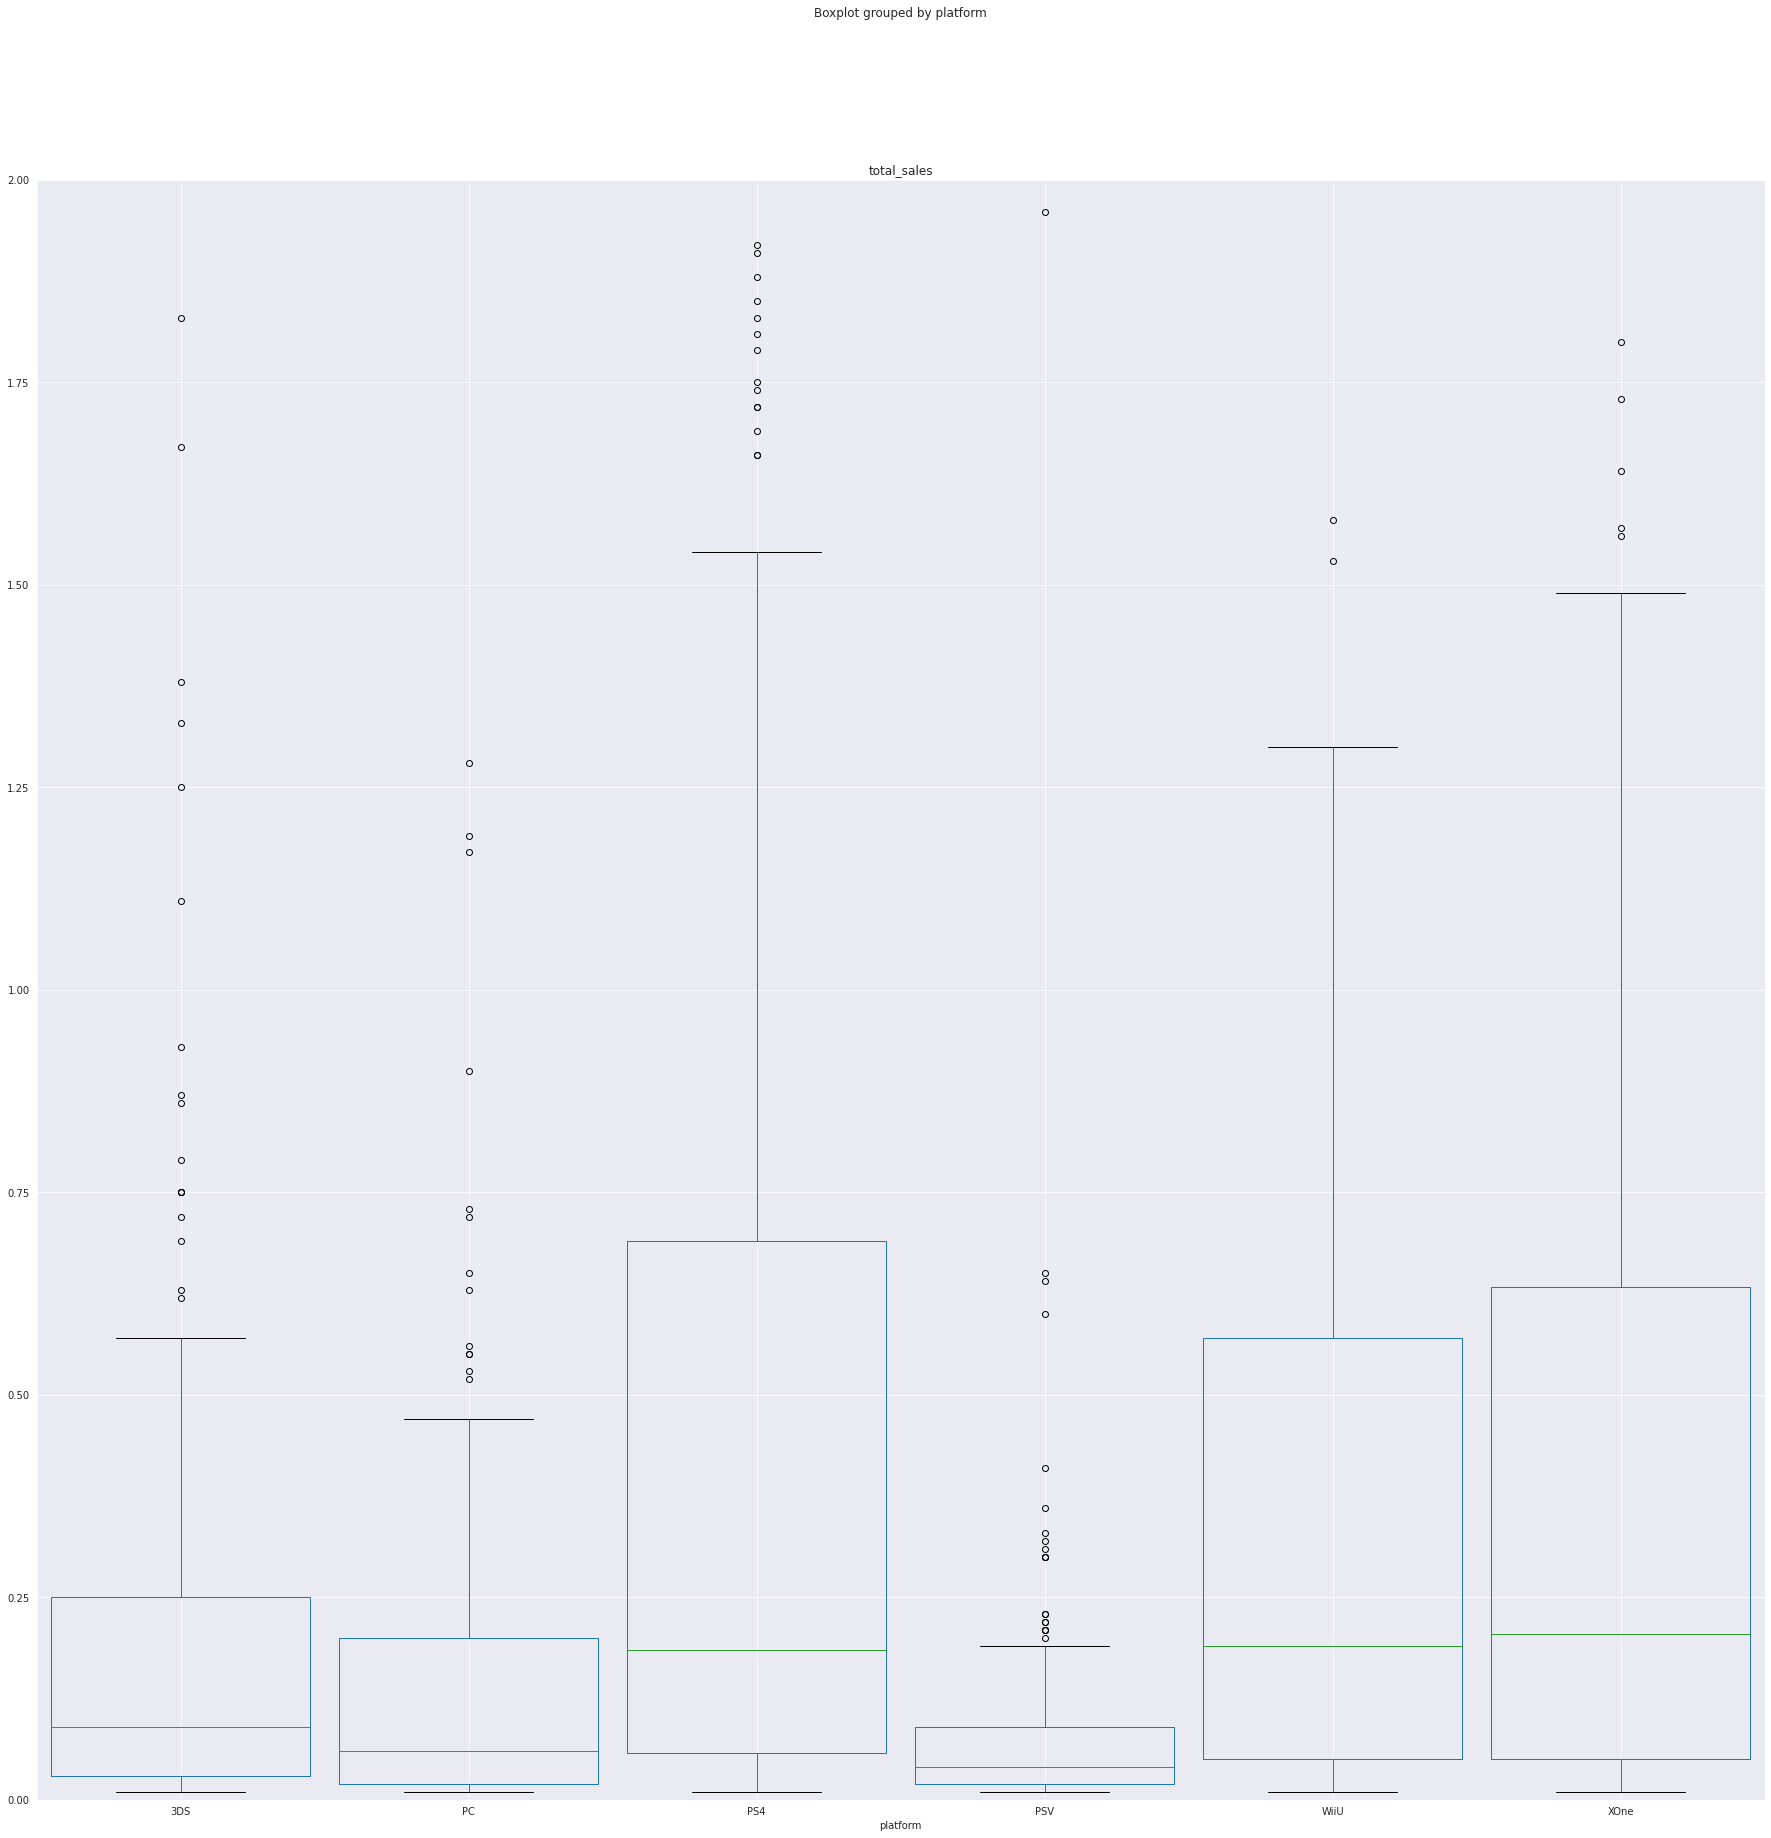

In [46]:
games_actual_per_top_platform.boxplot(column = 'total_sales', widths=0.9, by = 'platform', figsize = (30,30))
plt.ylim([0, 2])

Ящики "с усами" наглядно показывают:
* Самые лучшие верхние пределы нормы - у PS4 и X-One. Верхний "ус" ящика PS4 достигает значения чуть более 1.5 млн копий, а у X-One - чуть менее 1.5 млн копий;
* Медианное значение лучше всего у XOne, оно выше аналогичных показателей PS4 и WiiU, которые очень схожи между собой. 
* У платформы WiiU неплохие остальные показатели: верхний "ус" достигает значения более 1.25 млн проданных копий, самый высокий показатель платформы превышает отметку в 7 млн;
* Больше всего аномально высоких значений было у платформ PS4 и 3DS. Самое высокое значение у каждой платформы превысило значение в 14 млн проданных копий;
* PC и PSV показали самые скромные результаты в данном ТОП-6: у PC топовый показатель слегка превысил 1.25 млн проданных копий, у PSV он не дотянул даже до отметки в 0.75 млн. У последнего также самая низкая медиана, у PC медианное значение чуть выше.

По итогам всех проведённых исследований абсолютными победителями в категории "самая потенциально прибыльная платформа" становятся PS4 и X-One, далее за ними следует WiiU. Именно на основании данных этих трёх платформ и будут проводиться исследования в следующей секции.

### Влияние отзывов пользователей и критиков на продажи внутри платформы PS4

Следующий анализ - изучение влияния отзывов пользователей и критиков на продажи внутри самой популярной платформы PS4. 

In [47]:
games_actual_ps4 = games_actual.query('platform == "PS4"') 
games_actual__xone = games_actual.query('platform == "XOne"')    
games_actual_wiiu = games_actual.query('platform == "WiiU"') 

games_actual_ps4['platform'].unique()

array(['PS4'], dtype=object)

#### Влияние отзывов критиков 

Сначала будет изучено влияние отзывов критиков. 

Для каждой платформы будет построена диаграмма рассеяния:

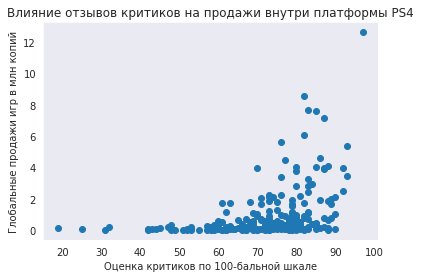

In [48]:
plt.scatter(x = games_actual_ps4['critic_score'], y =games_actual_ps4['total_sales'])
plt.title('Влияние отзывов критиков на продажи внутри платформы PS4')
plt.xlabel('Оценка критиков по 100-бальной шкале')
plt.ylabel('Глобальные продажи игр в млн копий')
plt.show()

Диаграмма наглядно показывает, что есть положительная зависимость между оценками критиками и объёмом продаж, особенно, когда оценка критиков превышает 60-70 баллов. Ещё более сильным это влияние становится в том случае, если рейтинг игры превышает 75-80 баллов.

In [49]:
games_actual_ps4['critic_score'].corr(games_actual_ps4['total_sales'])

0.40266141068104083

Корреляция составляет 0,41. Связь есть, но она не очень сильная.

Следует посмотреть, повторится ли данная тенденция для двух других популярных платформ: X-One и WiiU.

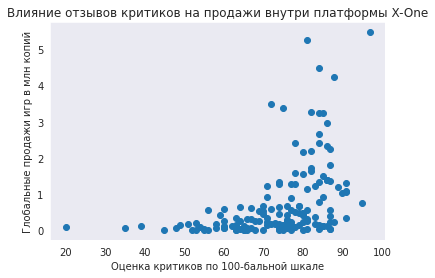

In [50]:
plt.scatter(x = games_actual_xone['critic_score'], y = games_actual_xone['total_sales'])
plt.title('Влияние отзывов критиков на продажи внутри платформы X-One')
plt.xlabel('Оценка критиков по 100-бальной шкале')
plt.ylabel('Глобальные продажи игр в млн копий')
plt.show()

In [51]:
games_actual_xone['critic_score'].corr(games_actual_xone['total_sales'])

0.42867694370333226

У X-One ситуация схожая с PS4: коэффициент корреляции составляет 0.43, связь есть, но она также не очень сильная. Чем выше оценка игры, тем больше она влияет на продажи.

WiiU:

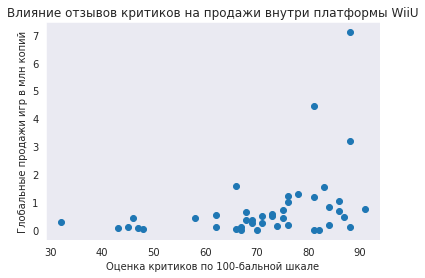

In [52]:
plt.scatter(x = games_actual_wiiu['critic_score'], y =games_actual_wiiu['total_sales'])
plt.title('Влияние отзывов критиков на продажи внутри платформы WiiU')
plt.xlabel('Оценка критиков по 100-бальной шкале')
plt.ylabel('Глобальные продажи игр в млн копий')
plt.show()

In [53]:
games_actual_wiiu['critic_score'].corr(games_actual_wiiu['total_sales'])

0.370201412480884

У WiiU коэффициент корреляции ниже - только 0.37. Но сохраняется схожая другими платформами тенденция: чем выше оценка критиков, тем сильнее она влияет на продажи.

#### Влияние отзывов пользователей

Аналогичный график будет построен и для оценки влияния отзывов пользователей на продажи внутри самой популярной платформы PS4.

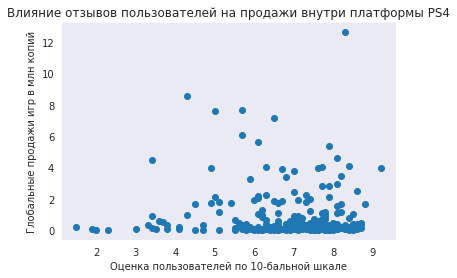

In [54]:
plt.scatter(x = games_actual_ps4['user_score'], y = games_actual_ps4['total_sales'])
plt.title('Влияние отзывов пользователей на продажи внутри платформы PS4')
plt.xlabel('Оценка пользователей по 10-бальной шкале')
plt.ylabel('Глобальные продажи игр в млн копий')
plt.show()

А вот оценка пользователей почти никак не влияет на продажи.

Корреляция:

In [55]:
games_actual_ps4['user_score'].corr(games_actual_ps4['total_sales'])

-0.040131589472697356

Коэффициент корелляции крайне мал, можно утверждать, что зависимости нет.

X-one:

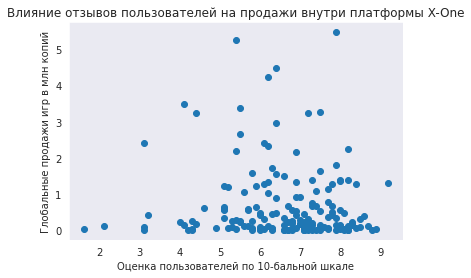

In [56]:
plt.scatter(x = games_actual_xone['user_score'], y = games_actual_xone['total_sales'])
plt.title('Влияние отзывов пользователей на продажи внутри платформы X-One')
plt.xlabel('Оценка пользователей по 10-бальной шкале')
plt.ylabel('Глобальные продажи игр в млн копий')
plt.show()

In [57]:
games_actual_xone['user_score'].corr(games_actual_xone['total_sales'])

-0.0703839280647581

Результаты очень схожи с результатами по PS4, уровень корреляции крайне низкий.

Наконец, WiiU:

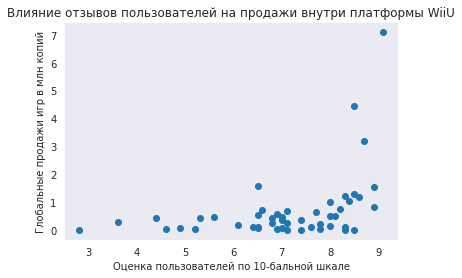

In [58]:
plt.scatter(x = games_actual_wiiu['user_score'], y = games_actual_wiiu['total_sales'])
plt.title('Влияние отзывов пользователей на продажи внутри платформы WiiU')
plt.xlabel('Оценка пользователей по 10-бальной шкале')
plt.ylabel('Глобальные продажи игр в млн копий')
plt.show()

In [59]:
games_actual_wiiu['user_score'].corr(games_actual_wiiu['total_sales'])

0.40792645792170773

А вот у WiiU ситуация совершенно другая: коэффициент корреляции составил целых 0.41, есть несильное влияние.

**Итоги:**

Подводя итоги, можно сказать: 
* отзывы критиков имеют умеренное влияние на продажи внутри платформы, результаты трёх самых популярных платформ подтверждают это утверждение;
* отзывы геймеров не влияют на продажи игр для PS4 и X-One, но имеют умеренное влияние на продажи игр для WiiU.

Причина может заключаться в том, что игры зачастую покупают в момент релиза, когда среди оценок есть только рецензии критиков, получивших свои копии игр раньше обычных игроков. В таком случае, даже если игра пользователю не понравилась, он всё равно её уже приобрёл.

###   Распределение игр по жанрам. Самые прибыльные жанры, жанры с высокими и низкими продажами

Финальный этап исследовательского анализа данных - изучение распределения игр по жанрам.

Сначала будет изучено, игры каких жанров лучше всего продавались за актуальный период:

In [60]:
games_actual_per_genre = games_actual.groupby('genre')['total_sales'].sum().reset_index().sort_values(by = 'total_sales', ascending = False)
games_actual_per_genre

,genre,total_sales
0,Action,199.36
8,Shooter,170.94
10,Sports,109.48
7,Role-Playing,101.44
3,Misc,37.55
2,Fighting,28.22
6,Racing,27.52
4,Platform,18.09
1,Adventure,17.55
9,Simulation,13.13


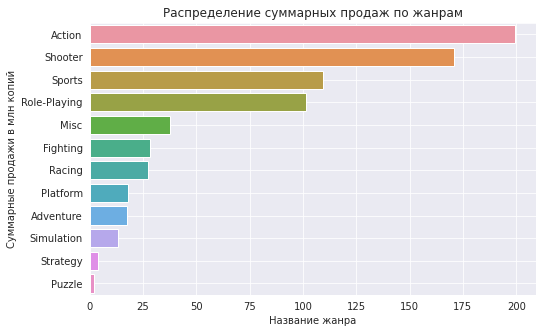

In [61]:
sns.set_style('dark')
plt.figure(figsize=(8, 5))
sns.barplot(x = 'total_sales', y = 'genre', data = games_actual_per_genre)
plt.title('Распределение суммарных продаж по жанрам')
plt.xlabel('Название жанра')
plt.ylabel('Суммарные продажи в млн копий')
plt.grid()
plt.show()

Три самых продаваемых жанра - Action (всего продано 199,4 млн копий), Shooter (171 млн копий) и Sports (109.5 млн копий). Наименее востребованы Puzzle (2.2 млн), Strategy (4 млн) и Simulation (13,1 млн копий).

Диаграмма размаха:

In [62]:
games_actual_per_top_platform = games_actual[(games_actual['platform'] == 'PS4') | (games_actual['platform'] == 'XOne') | 
                                             (games_actual['platform'] == 'WiiU')| (games_actual['platform'] == '3DS') |
                                             (games_actual['platform'] == 'PC')  | (games_actual['platform'] == 'PSV')]
games_actual_per_top_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.00,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014.00,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.00,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015.00,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.00,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16703,Strawberry Nauts,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014.00,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


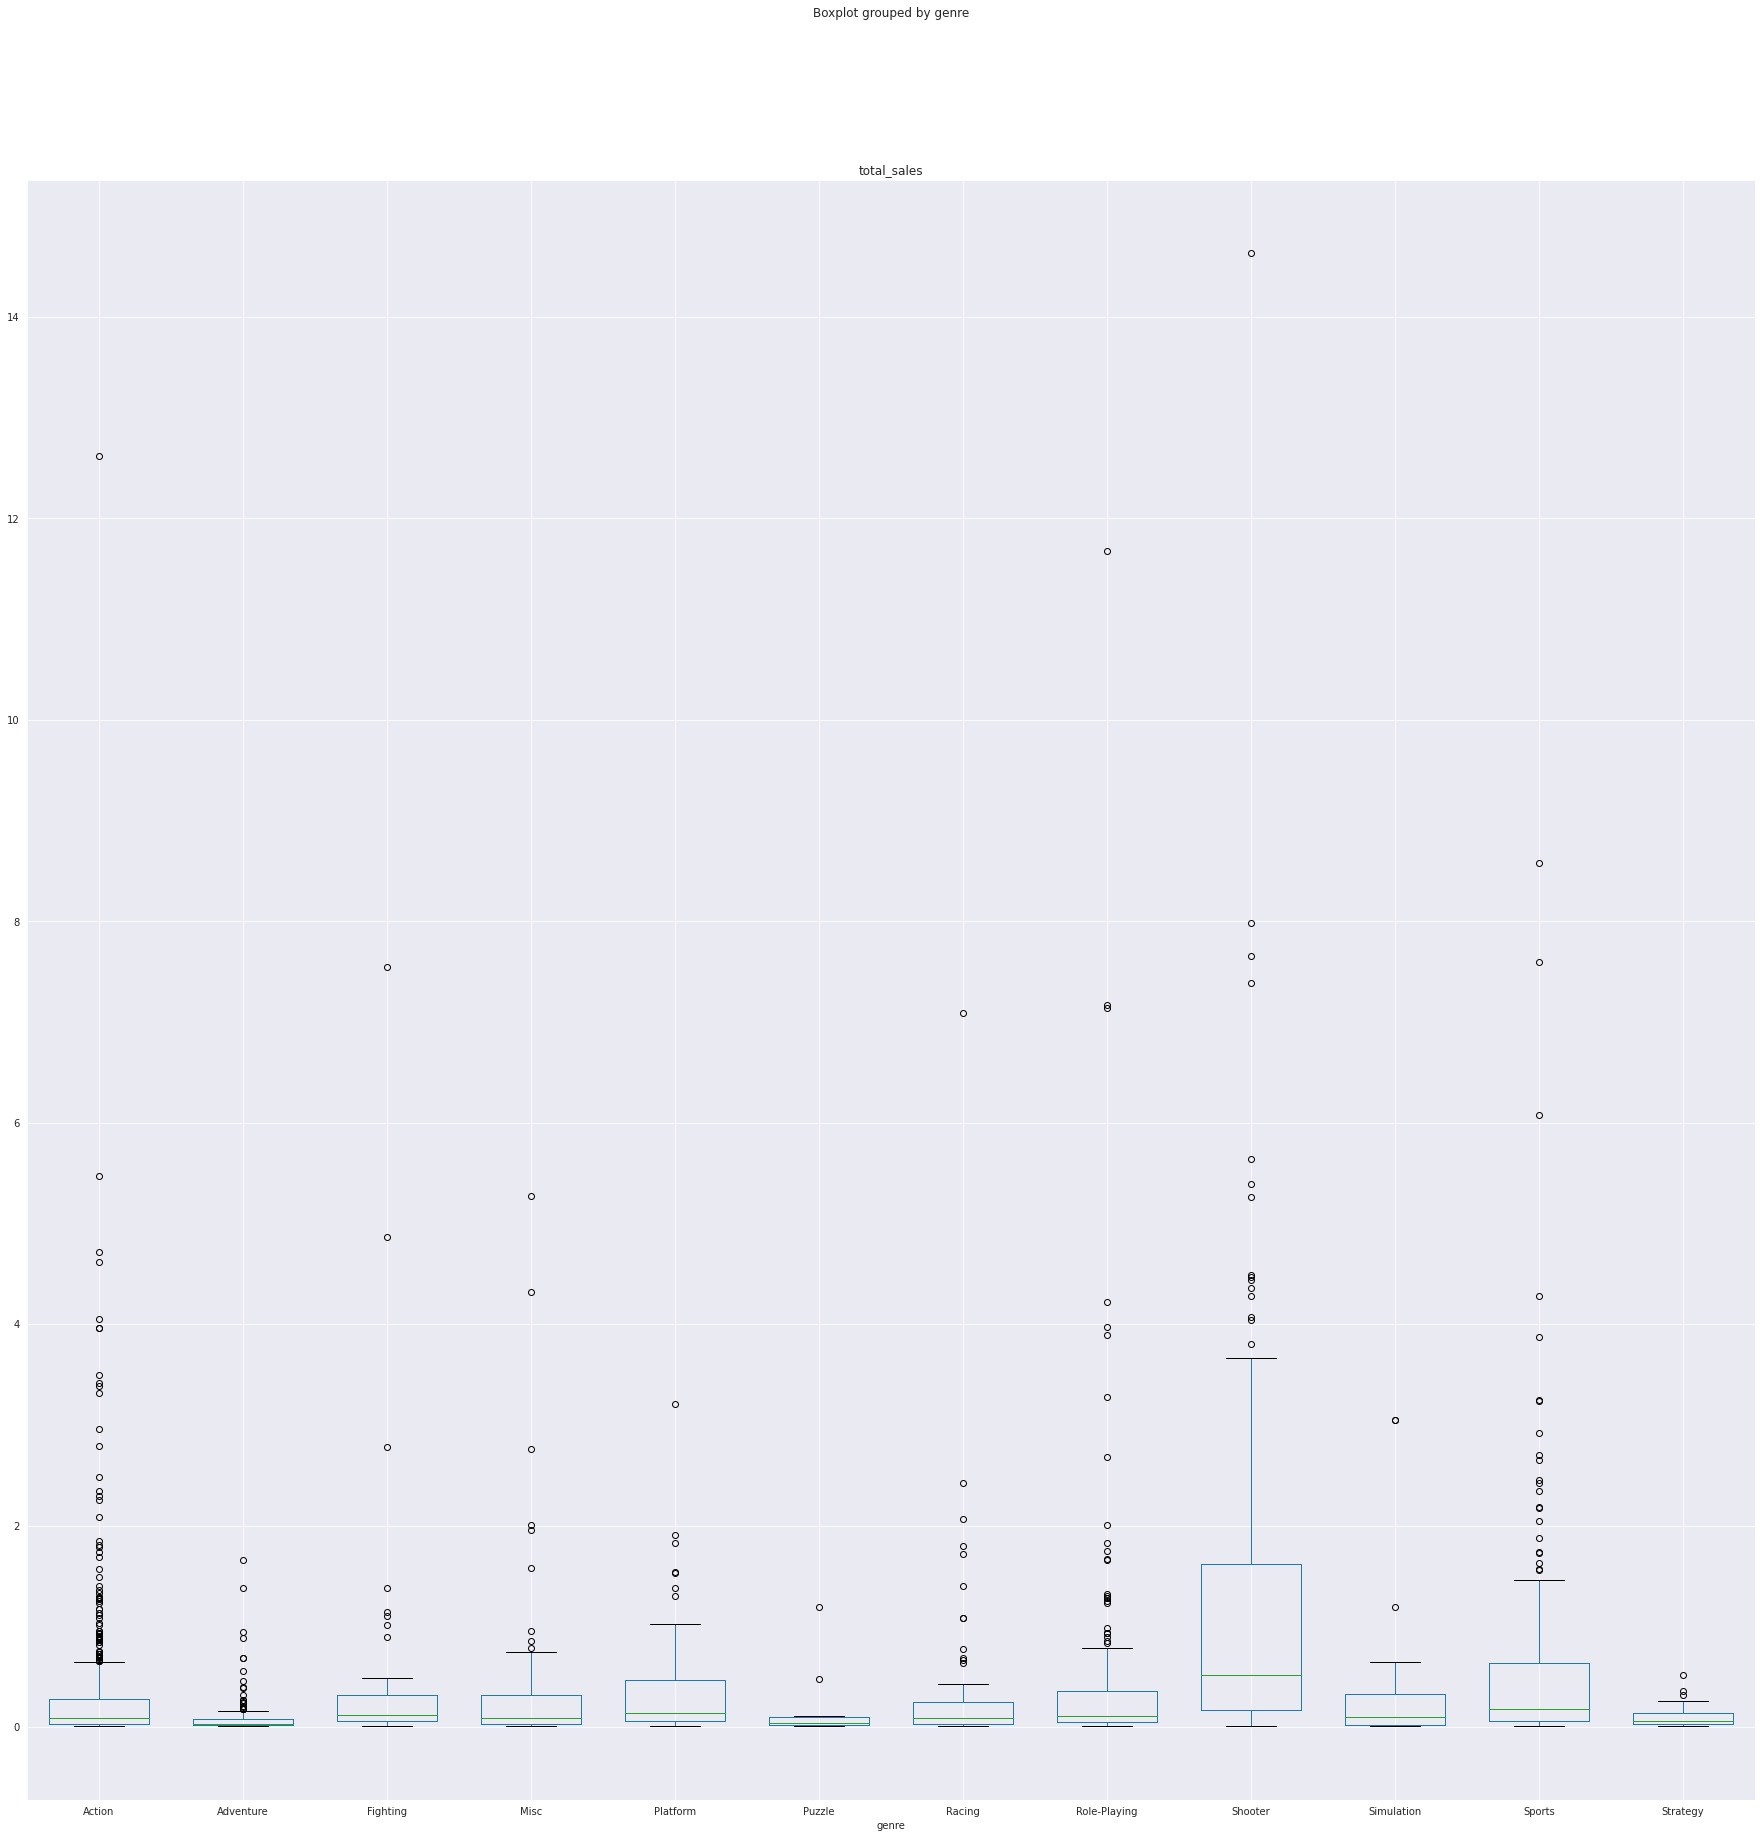

In [63]:
games_actual.boxplot(column = 'total_sales', widths=0.7, by = 'genre', figsize = (30,30));

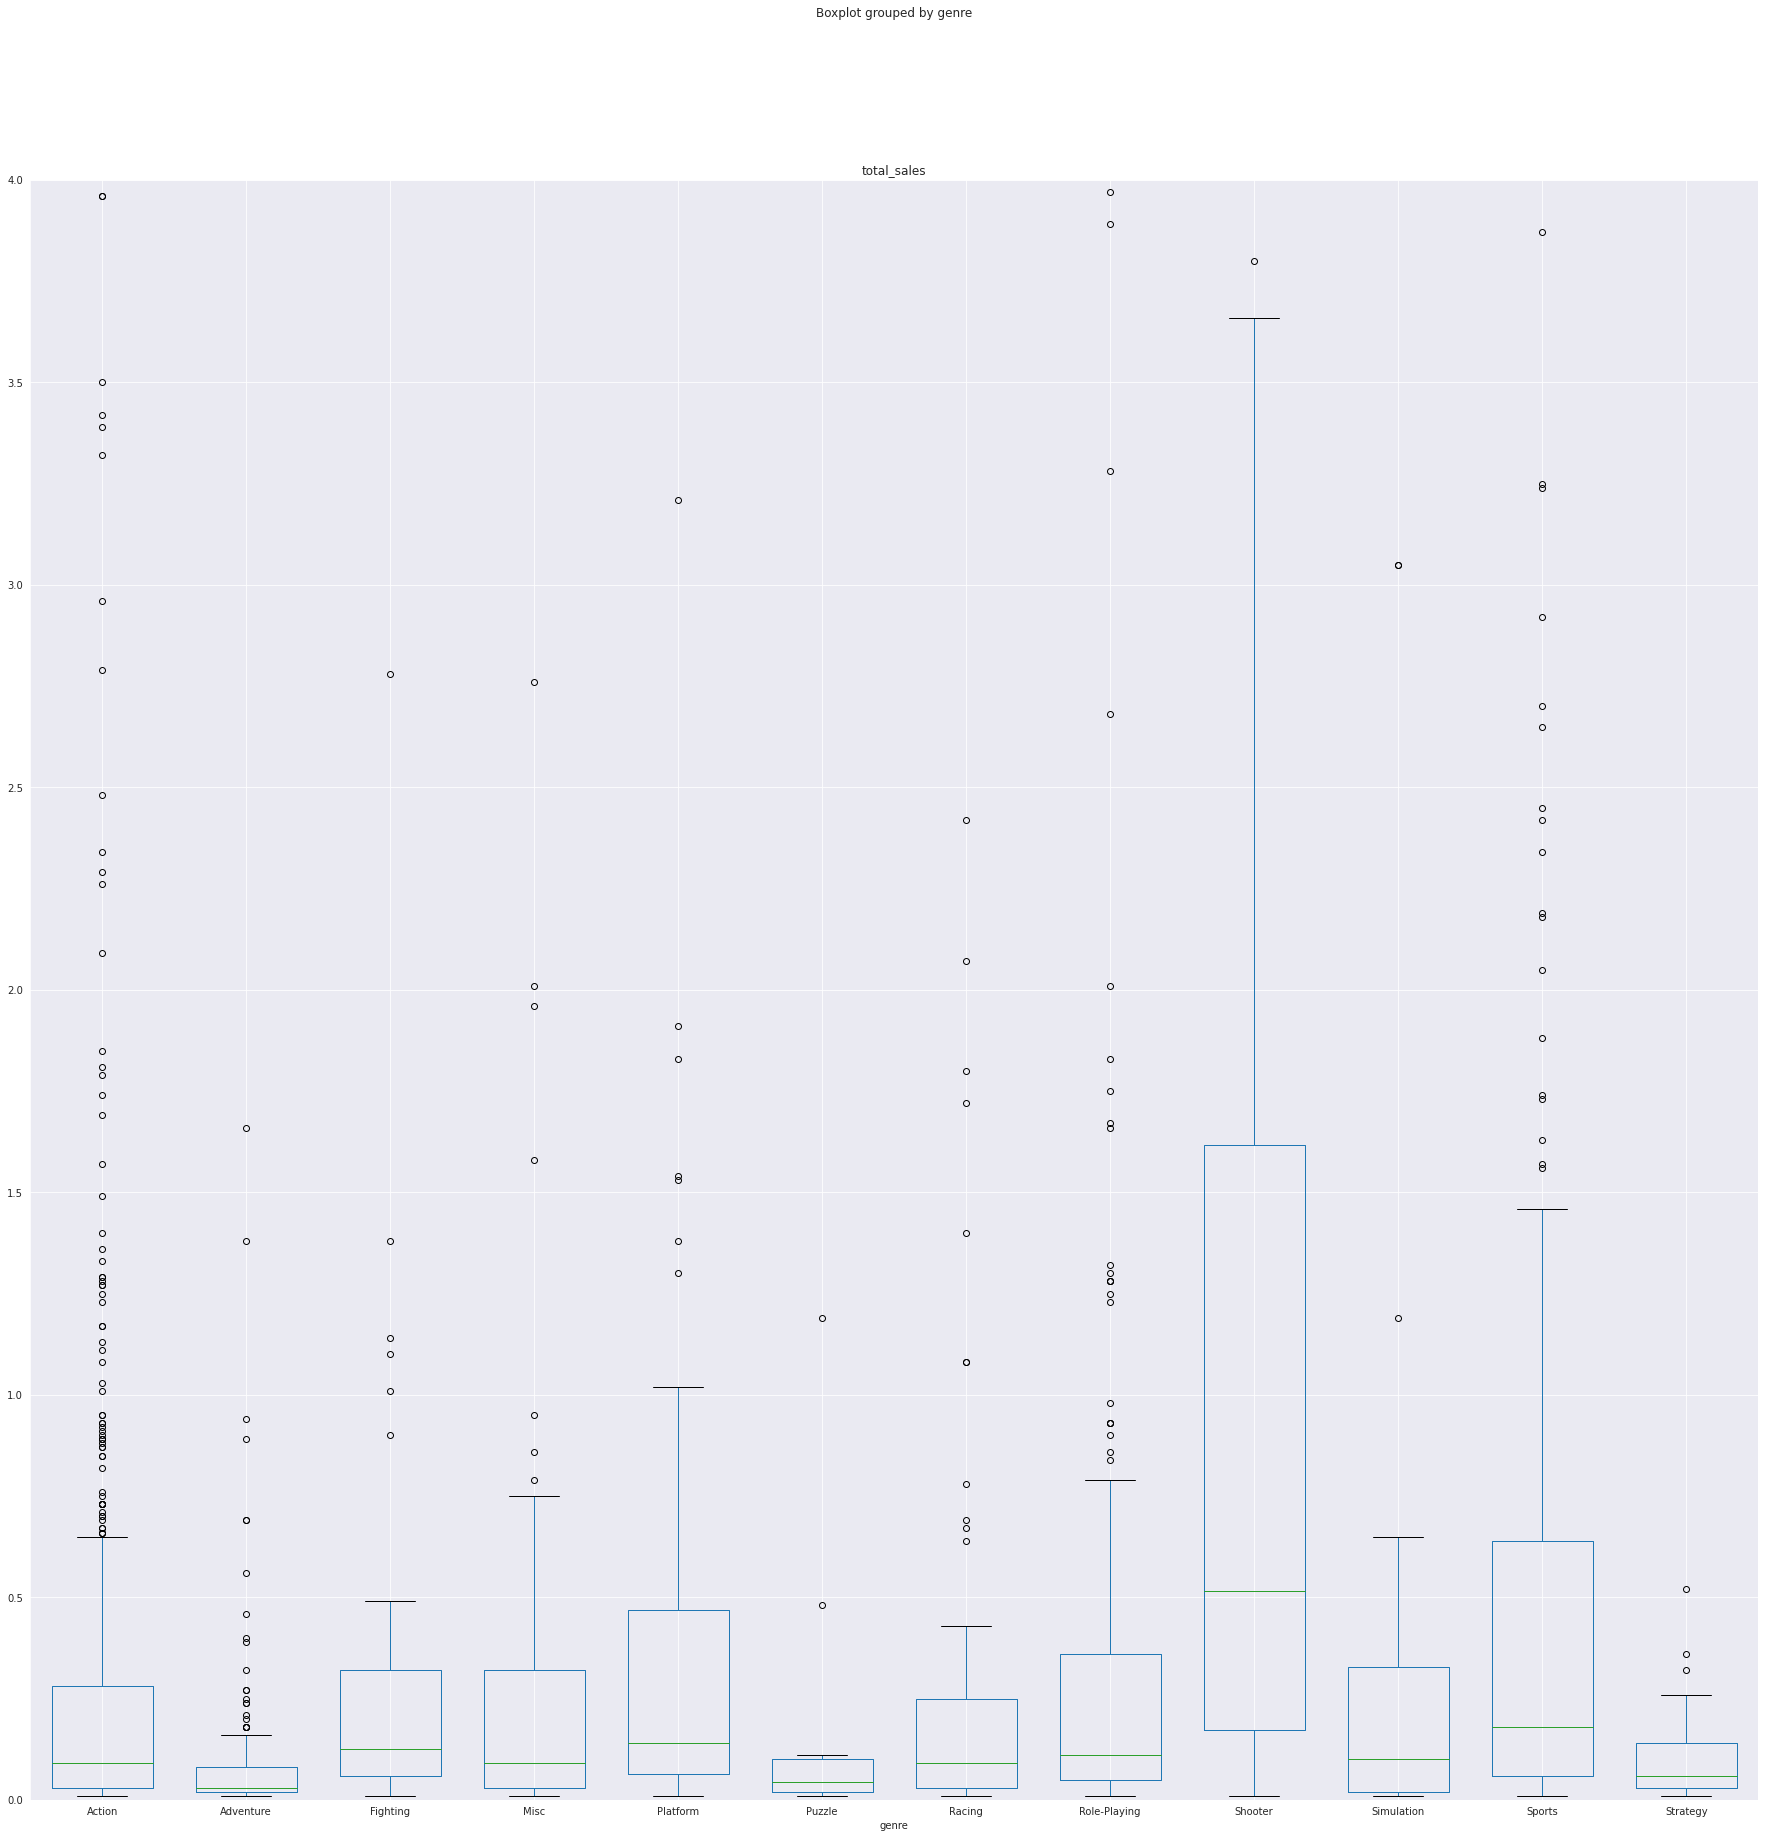

In [64]:
games_actual.boxplot(column = 'total_sales', widths=0.7, by = 'genre', figsize = (30,30))
plt.ylim([0, 4]);

Первое, что сразу заметно на графике - очень большие и длинные boxplot'ы у жанров Shooter и Sports. У Shooter также очень длинный верхний "ус", заканчивающийся на отметке чуть выше 3.5 млн проданных копий,  а один из его "выбросов" является абсолютным рекордсменом по количеству проданных копий - свыше 14 млн. 75% квантиль также самый высокий в группе - выше 1.5 миллионов проданных копий. Медиана тоже рекордсмен - более 0.5 млн. Можно с уверенностью констатировать, что Shooter с большим отрывом от конкурентов лидирует по всем направлениям.
Результаты Sports заметно скромнее, но тоже впечатляют: верхний "ус" почти достигает отметки в 1.5 млн проданных копий, 75% квантиль находится на уровне примерно 0.7 млн. "Выбросы" расположены на графике ниже даже по сравнению с другими жанрами, чьи boxplot'ы при этом выглядят намного скромнее. Медиана составляет приблизительно 0.2 млн проданных копий. 
Любопытно, что лидер абсолютных продаж в млн копий, жанр Action, показывает на фоне других жанров довольно скромный boxplot: медианное значение составляет около 0.1 млн, 75% квантиль находится на уровне примерно в 0.25 млн проданных копий, верхний "ус" слегка превышает уровент в 0.6 млн. Но при этом у жанра огромное количество "выбросов", порой достигающих впечатляющих цифр, а лучший результат - более 12 млн копий - уступает в выборке только лучшему результату жанра Shooter. 

Таким образом, можно придти к следующим выводам:
* Высокие значения абсолютных продаж не гарантируют высокие медианные значения и стабильность в плане высоких продаж игр. Так, жанр Action оказался довольно непредсказуемым: при наличии большого числа "выбросов" с высокими показателями, медианное значение и 75%-квантиль жанра оказались довольно скромными, уступив даже такому жанру, как Platform, занявшему лишь 8 место в ТОПе продаж. Action - довольно "рискованный" жанр, игры которого в целом показывают либо довольно скромный результат, либо становятся "звёздами".
* Занявшие 2 и 3 место в количестве проданных млн копий Shooter и Sports соответственно показывают куда более стабильные результаты: их медианные значения и 75%-квантили гораздо выше, чем у Action, но и "выбросов" с высокими продажами меньше. Выпускать игры в этих жанрах "безопаснее", но и шансов заработать на игре колоссальные деньги меньше, чем у жанра Action.

##   Портрет пользователя каждого региона

Следующий этап исследовани - составление портрета пользователя каждого уточнённого региона: европейского, северо-американского и японского. 

Исследование будет проводиться в разных разрезах: с разбивкой по платформам, потом по жанрам, затем по по рейтингу ESRB. Для каждого исследования будут созданы соответствующие сводные таблицы и нарисованы графики.

### Платформы

Сначала будет создана сводная таблица с разбивкой по платформам и регионам:

In [65]:
popular_platform_by_region = pd.pivot_table(games_actual,
                                            index='platform', 
                                            values = ['na_sales', 'eu_sales','jp_sales'],
                                            aggfunc= 'sum')
popular_platform_by_region = popular_platform_by_region.sort_values(by = 'eu_sales', ascending = False)
popular_platform_by_region

,eu_sales,jp_sales,na_sales
platform,,,
PS4,130.04,15.02,98.61
XOne,46.25,0.32,81.27
PS3,25.54,11.22,22.05
PC,17.97,0.00,7.23
3DS,16.12,44.24,22.64
X360,15.49,0.08,28.30
WiiU,13.15,7.31,19.36
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08


И отрисован соответствующий график:

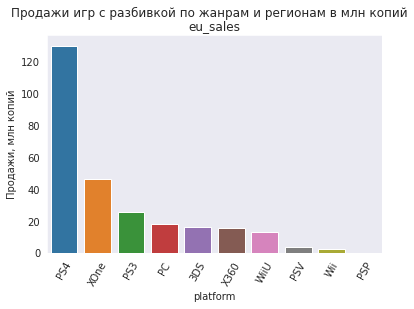

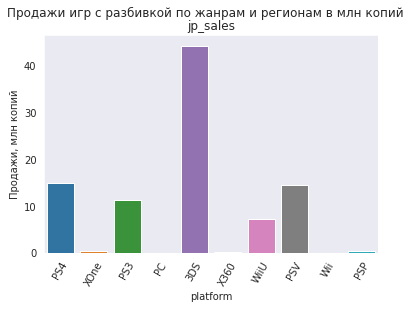

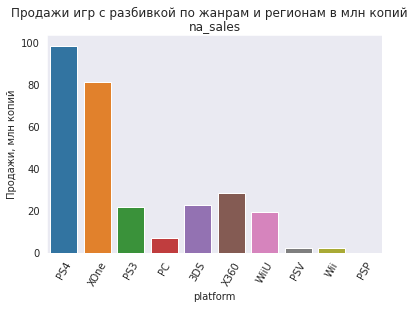

In [66]:
for col in popular_platform_by_region.columns:
    sns.barplot(x = popular_platform_by_region.index, y = col, data = popular_platform_by_region)
    plt.ylabel("Продажи, млн копий")
    plt.xticks(rotation=60)
    plt.title(col)
    plt.suptitle('Продажи игр с разбивкой по жанрам и регионам в млн копий')
    plt.show()

Добавление столбцов с долями в процентах:

In [67]:
popular_platform_by_region['eu_sales_percentage'] = popular_platform_by_region['eu_sales']/(popular_platform_by_region['eu_sales'].sum()) * 100
popular_platform_by_region['jp_sales_percentage'] = popular_platform_by_region['jp_sales']/(popular_platform_by_region['jp_sales'].sum()) * 100
popular_platform_by_region['na_sales_percentage'] = popular_platform_by_region['na_sales']/(popular_platform_by_region['na_sales'].sum()) * 100
popular_platform_by_region

,eu_sales,jp_sales,na_sales,eu_sales_percentage,jp_sales_percentage,na_sales_percentage
platform,,,,,,
PS4,130.04,15.02,98.61,48.04,16.13,34.71
XOne,46.25,0.32,81.27,17.09,0.34,28.61
PS3,25.54,11.22,22.05,9.44,12.05,7.76
PC,17.97,0.00,7.23,6.64,0.00,2.55
3DS,16.12,44.24,22.64,5.96,47.52,7.97
X360,15.49,0.08,28.30,5.72,0.09,9.96
WiiU,13.15,7.31,19.36,4.86,7.85,6.82
PSV,3.53,14.54,2.52,1.30,15.62,0.89
Wii,2.59,0.00,2.08,0.96,0.00,0.73


ТОП-5 популярных платформ по странам:
* Европейский регион:
    * PS4 - 130 млн копий, или 48% от общего количества проданных копий;
    * X-One  - 46.3 млн копий, или 17% от общего количества;
    * PS3 - 25.5 млн копий (9.4% от общего количества).
    * PC - 18 млн копий, или 6.6% от общего количества; 	
    * 3DS - 16.1 млн копий (6% от общего количества);
* Японский регион:
    * 3DS - 44.2 млн копий, или 47.5% от общего количества проданных копий; 	
    * PS4 - 15 млн копий, или 16.1% от общего количества;	
    * PSV - 14.5 млн копий, или 15.6% от общего количества; 	
    * PS3 - 11.2 млн копий (12% от общего количества);
    * WiiU - 7.31 млн копий (7.9% от общего количества).   
* Северо-американский регион:
    * PS4 - 98.6 млн копий, или 34.7% от общего количества проданных копий; 
    * X-One - 81.3 млн копий, или 28.6% от общего количества; 	
    * X360  - 28.3 млн копий, или 10% от общего количества; 	
    * 3DS - 22.6 млн копий (8% от общего количества);
    * PS3 - 22 млн копий (7.8% от общего количества).
    
**Выводы:**
* Популярность платформы сильно зависит от региона продаж;
* В европейском и в северо-американском секторах лидирует PS4 и X-One, на японском рынке - 3DS и PS4;
* Во всех трёх ТОП-5 есть PS4, PS3 и 3DS.

Графики по каждому региону:

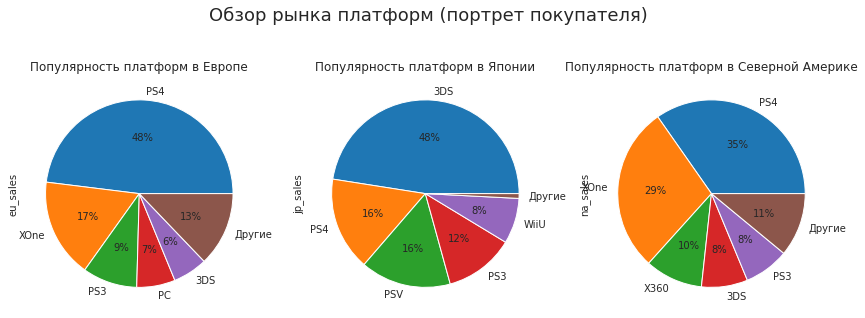

In [68]:
regions = ['Популярность платформ в Европе', 'Популярность платформ в Японии', 'Популярность платформ в Северной Америке']
platform_sales = games_actual.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
fig, ax = plt.subplots(1, len(platform_sales.columns), figsize=(12, 5))
for i in range(len(platform_sales.columns)):
    region_sales = platform_sales.iloc[:, i].sort_values(ascending=False).reset_index()  
    region_sales.loc[5] = ['Другие', region_sales.iloc[5:, 1].sum().round(2)]
    region_sales = region_sales.iloc[:6].set_index('platform')
    region_sales.iloc[:, 0].plot(
        kind='pie',
        ax=ax[i],
        autopct=lambda x: f'{x:.0f}%' if x > 5 else None, 
        title=regions[i]
    )
plt.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=18)
plt.tight_layout()
plt.show()

### Жанры

Создание аналогичной сводной таблицы и графиков с разбивкой по жанрам:

In [69]:
popular_platform_by_genre = pd.pivot_table(games_actual,
                                            index='genre', 
                                            values = ['na_sales', 'eu_sales','jp_sales'],
                                            aggfunc= 'sum')
popular_platform_by_genre = popular_platform_by_genre.sort_values(by = 'eu_sales', ascending = False)

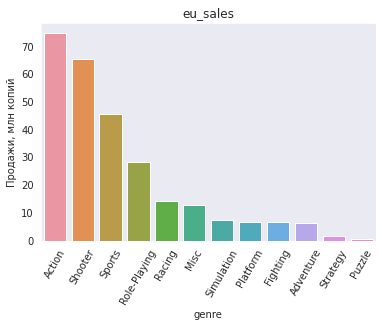

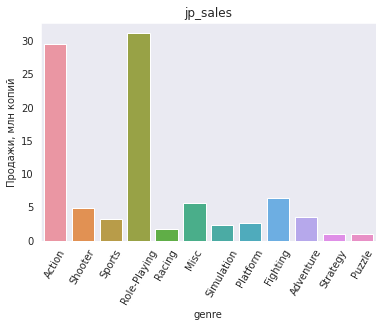

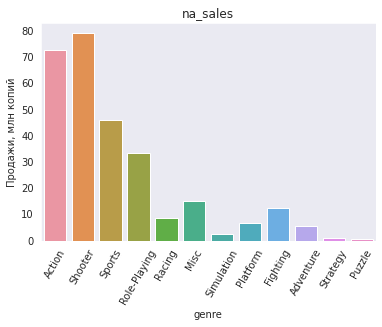

In [70]:
for col in popular_platform_by_genre.columns:
    figsize = (15,15)
    sns.barplot(x = popular_platform_by_genre.index, y = col, data = popular_platform_by_genre)
    plt.ylabel("Продажи, млн копий")
    plt.xticks(rotation=60)
    plt.title(col)
    plt.show()

In [71]:
popular_platform_by_genre['eu_sales_percentage'] = popular_platform_by_genre['eu_sales']/(popular_platform_by_genre['eu_sales'].sum()) * 100
popular_platform_by_genre['jp_sales_percentage'] = popular_platform_by_genre['jp_sales']/(popular_platform_by_genre['jp_sales'].sum()) * 100
popular_platform_by_genre['na_sales_percentage'] = popular_platform_by_genre['na_sales']/(popular_platform_by_genre['na_sales'].sum()) * 100
popular_platform_by_genre

,eu_sales,jp_sales,na_sales,eu_sales_percentage,jp_sales_percentage,na_sales_percentage
genre,,,,,,
Action,74.68,29.58,72.53,27.59,31.78,25.53
Shooter,65.52,4.87,79.02,24.21,5.23,27.82
Sports,45.73,3.26,46.13,16.89,3.50,16.24
Role-Playing,28.17,31.16,33.47,10.41,33.47,11.78
Racing,14.13,1.76,8.74,5.22,1.89,3.08
Misc,12.86,5.61,15.05,4.75,6.03,5.30
Simulation,7.30,2.31,2.63,2.70,2.48,0.93
Platform,6.80,2.69,6.79,2.51,2.89,2.39
Fighting,6.69,6.37,12.43,2.47,6.84,4.38


ТОП-5 популярных жанров по странам:
* Европейский регион:
    * Action - 74.7 млн копий, или 28% от общего количества;
    * Shooter - 65.5  млн копий, или 24% от общего количества проданных копий; 		
    * Sports - 45.7 млн копий, или 16.9% от общего количества;	
    * Role-Playing- 28.2 млн копий (10.4% от общего количества);
    * Misc - 12.9 млн копий (4.75% от общего количества).    
* Японский регион:
    * Role-Playing - 31.2 млн копий, или 33.5% от общего количества проданных копий; 	
    * Action - 29.6 млн копий, или 31.8% от общего количества; 	
    * Fighting - 6.4 млн копий, или 6.8% от общего количества; 	
    * Misc - 5.6 млн копий (6% от общего количества);
    * Shooter - 4.9 млн копий (5.2% от общего количества).    
* Северо-американский регион:
    * Shooter - 79 млн копий, или 27.8% от общего количества проданных копий; 
    * Action - 72.5 млн копий, или 25.5% от общего количества; 	
    * Sports - 46.1 млн копий (16.2% от общего количества)
    * Role-Playing - 33.5 млн копий, или 11.8% от общего количества; 	
    * Misc - 15.1 млн копий (5.3% от общего количества).

**Выводы:**
* Популярность жанра также сильно зависит от региона продаж;
* В европейском и в северо-американском регионах лидируют Shooter, Action и Sports, на японском рынке - Role-Playing, Action и Fighting.
* Shooter, Action и Misc присутствуют во всех трёх ТОПах.

Графики:

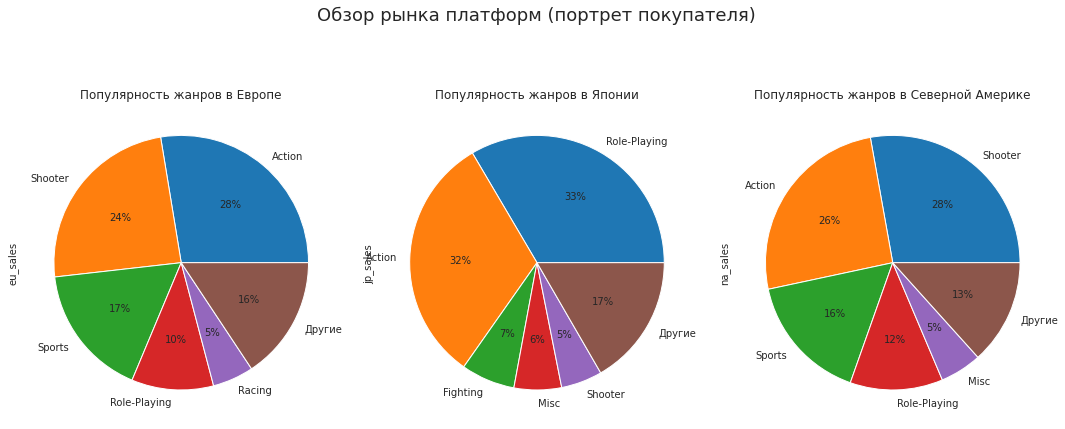

In [72]:
regions = ['Популярность жанров в Европе', 'Популярность жанров в Японии', 'Популярность жанров в Северной Америке']
platform_sales = games_actual.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
fig, ax = plt.subplots(1, len(platform_sales.columns), figsize=(15, 7))
for i in range(len(platform_sales.columns)):
    region_sales = platform_sales.iloc[:, i].sort_values(ascending=False).reset_index()  
    region_sales.loc[5] = ['Другие', region_sales.iloc[5:, 1].sum().round(2)]
    region_sales = region_sales.iloc[:6].set_index('genre')
    region_sales.iloc[:, 0].plot(
        kind='pie',
        ax=ax[i],
        autopct=lambda x: f'{x:.0f}%' if x > 5 else None, 
        title=regions[i]
    )
plt.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize=18)
plt.tight_layout()
plt.show()

### Рейтинг ESRB

Последний анализ в данном разделе - определить, влияет ли рейтинг ESRB на продажи в отдельном регионе.

В Главе 2 при проведении подготовки к анализу всем играм без указания жанра, а также 15 играм, имеющим очень редко встречающиеся жанры, была присвоена категория 'unknown'.

Так как рейтинг ESRB является категориальным значением, с целью определения его влияния на продажи будет проанализировано, сколько игр разных рейтингов продавалось в каждом из трёх регионов.
Для этого снова будут построена сводная таблица и графики:

In [73]:
popular_platform_by_rating = pd.pivot_table(games_actual,
                                            index='rating', 
                                            values = ['na_sales', 'eu_sales','jp_sales'],
                                            aggfunc= 'sum')
popular_platform_by_rating = popular_platform_by_rating.sort_values(by = 'eu_sales', ascending = False)

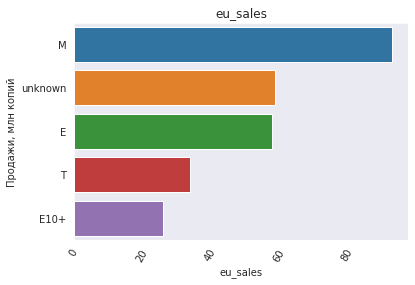

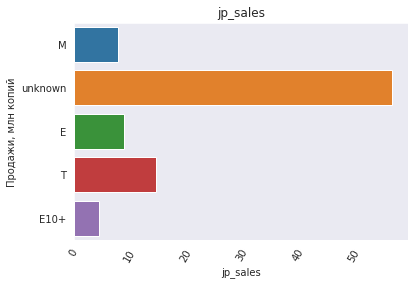

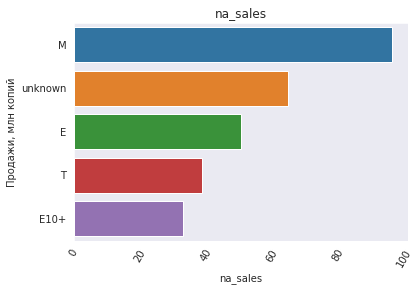

In [74]:
for col in popular_platform_by_rating.columns:
    figsize = (15,15)
    sns.barplot(x = col, y = popular_platform_by_rating.index, data = popular_platform_by_rating)
    plt.ylabel("Продажи, млн копий")
    plt.xticks(rotation=60)
    plt.title(col)
    plt.show()

In [75]:
popular_platform_by_rating['eu_sales_percentage'] = popular_platform_by_rating['eu_sales']/(popular_platform_by_rating['eu_sales'].sum()) * 100
popular_platform_by_rating['jp_sales_percentage'] = popular_platform_by_rating['jp_sales']/(popular_platform_by_rating['jp_sales'].sum()) * 100
popular_platform_by_rating['na_sales_percentage'] = popular_platform_by_rating['na_sales']/(popular_platform_by_rating['na_sales'].sum()) * 100
popular_platform_by_rating

,eu_sales,jp_sales,na_sales,eu_sales_percentage,jp_sales_percentage,na_sales_percentage
rating,,,,,,
M,93.44,8.01,96.42,34.52,8.60,33.94
unknown,58.95,56.90,64.72,21.78,61.12,22.78
E,58.06,8.94,50.74,21.45,9.60,17.86
T,34.07,14.78,38.95,12.59,15.88,13.71
E10+,26.16,4.46,33.23,9.66,4.79,11.70


Продажи игр в зависимости от рейтинга по странам:
* У европейского и северо-американского регионов места в ТОПах распределились одинаково:
    * Больше всего было продано игр с рейтингом М - 93.4 млн копий, или 34.5% от общего количества проданных копий в европейском регионе, 96.4 млн копий (33.9%) в северо-американском;
    * На втором месте расположился жанр unknown, т.е. игры, жанр у которых в выборке не был определён. Таких игр было продано 59 млн копий (21.8%) и 64.7 млн копий (22.8%) в европейском и северо-американском регионе соответственно;
    * Третье место у  E - 58 млн копий, или 21.5% от общего количества в европейском, 50.7 млн копий (17.9%) в северо-американском регионе;
    * На четвёртом месте T - 34 млн копий (12.6%) и 39 млн копий (13.7%) в европейском и северо-американском регионе соответственно.
    * Игры с рейтингом E10+ расположились на пятой позиции: 26.2 млн копий, или 9.7% от общего количества в европейском, 33.2 млн копий (11,7%) в северо-американском регионе.
    
* В японском регионе ситуация следующая:
    * Игры с "рейтингом" unknown - на первом месте, таких игр в выборке аж на 56.9 млн проданных копий, что составляет 61.1% от всего количества проданных копий в Японии. В связи с этим нужно особенно осторожно относиться к информации, касающейся остальных данных. 
    * Второе место у рейтинга T - 14.8 млн копий, или 15.9% от общего количества проданных копий; 	
    * Третье у E - 8.9 млн копий, или 9.6% от общего количества; 	
    * Четвёртое место за M - 8 млн копий, или 8.6% от общего количества; 	
    * Наименее популярен рейтинг E10+ - всего 4.4 млн копий (4.8 % от общего количества).

**Выводы:**
* В выборке большое количество игр с неизвестным жанром, что сильно затрудняет интерпретацию результатов. Особенно это заметно в японском секторе, где таких игр более 60% от общего количества проданных копий. В европейском и северо-американском секторах такие игры составляют 22-23% от общего количества проданных копий, что тоже много, но позволяет сделать аккуратные выводы. Рекомендуется провести дополнительное специализированное исследование по жанрам игр, особенно для японского сектора;
* В европейском и северо-американского регионах лидирует рейтинг М;
* В японском регионе среди игр с идентифицированным рейтингом наибольшим общим тиражом продались игры с рейтингом T.

##   Проверка гипотез

Последний этап исследования - проверка двух гипотез.

###   Гипотеза 1

Необходимо проверить гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Будет использоваться специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам scipy.stats.ttest_ind().

Для использования данного метода должны выполняться следующие условия:

* "Генеральные совокупности не зависят друг от друга" - это условие выполнено;
* "Выборочные средние нормально распределены" - условие выполнено, т.к. выборки достаточно велики (182 и 155 значений);

Также есть следующее важное условие: "Дисперсии рассматриваемых генеральных совокупностей равны". Так как выборки не равны по размеру, и нет информации о дисперсиях рассматриваемых генеральных совокупностей, параметр equal_var будет указан как False.

Для проверки гипотезы необходимо подготовить наборы значений, которые будут сравниваться друг с другом.

In [76]:
games_xbox_one = games_actual.query('platform == "XOne"')
sorted(games_xbox_one['year_of_release'].unique())

[2014.0, 2015.0, 2016.0]

In [77]:
games_pc = games_actual.query('platform == "PC"')
sorted(games_pc['year_of_release'].unique())

[2014.0, 2015.0, 2016.0]

Данные должны совпадать по годам.

In [78]:
games_pc = games_pc.query('year_of_release > 2012')
sorted(games_pc['year_of_release'].unique())

[2014.0, 2015.0, 2016.0]

Пустые значения также необходимо убрать.

In [79]:
games_xbox_one_score = games_xbox_one['user_score'].dropna()
games_pc_score = games_pc['user_score'].dropna()

Данные для проверки гипотезы готовы. 

Будут выдвинуты две гипотезы:
* H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* H1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

И выбран уровень статистической значимости (alpha):

In [80]:
alpha = 0.01 

results = st.ttest_ind(games_xbox_one_score, games_pc_score, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


p-value  — это вероятность при верной нулевой гипотезе получить наблюдаемое значение или более удалённое от того, которое предположили в нулевой гипотезе. В данном случае она составляет 14.76%, что явно выше выбранной альфы в 1%. Это означает, что отвергнуть нулевую гипотезу не получится, так как p-value больше альфы.

**Вывод:** не получилось отвергнуть нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

###   Гипотеза 2

Необходимо проверить гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Вторая гипотеза будет проверяться аналогичным путём.

Для использования данного метода должны выполняться следующие условие:
* "Генеральные совокупности не зависят друг от друга" - это условие выполнено;
* "Выборочные средние нормально распределены" - условие выполнено, т.к. выборки достаточно велики (523 и 195 значений);

Также есть следующее важное условие: "Дисперсии рассматриваемых генеральных совокупностей равны". Так как выборки снова не равные по размеру, в этот раз разница в размерах намного больше, и нет информации о дисперсиях рассматриваемых генеральных совокупностей, параметр equal_var будет указан как False.

Для проверки гипотезы необходимо подготовить наборы значений, которые будут сравниваться друг с другом.

In [82]:
games_action = games_actual.query('genre == "Action"')
sorted(games_action['year_of_release'].unique())

[2014.0, 2015.0, 2016.0]

In [83]:
games_sports = games_actual.query('genre == "Sports"')
sorted(games_sports['year_of_release'].unique())

[2014.0, 2015.0, 2016.0]

Здесь годы совпадают, менять ничего не нужно.

In [84]:
games_action_score = games_action['user_score'].dropna()
games_sports_score = games_sports['user_score'].dropna()

Будут выдвинуты две гипотезы:
* H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
* H1: Средние пользовательские рейтинги жанров Action и Sports не одинаковые (разные).

Уровень статистической значимости останется тем же:

In [85]:
alpha = 0.01 

results_2 = st.ttest_ind(games_action_score, games_sports_score, equal_var = False)

print('p-значение:', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза отвергнута') 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


В данном случае p-value составляет 5.99 * 10^(-20), что намного ниже выбранной альфы в 1%. Это означает, что отвергнуть нулевую гипотезу не получится, так как p-value больше альфы.

**Вывод:** нулевая гипотеза отвергнута. Средние пользовательские рейтинги жанров Action и Sports разные.

##   Выводы

Целью данного исследования является выявление определяющих успешность игры закономерности для интернет-магазина «Стримчик» с целью дальнейшего определения потенциально популярного продукта и планирования успешных компаний.

Был проведён разносторонний анализ имеющихся данных, и сделаны следующие выводы:

* Пик выхода игр пришёлся на период 2007-2011;
* Приблизительная "продолжительность жизни" каждой платформы - 9-10 лет. Для "цикла" характерен рост в первые годы "жизни", который длится от 4 до 6 лет, достигая в итоге своего пика, после чего показатели начинают падать, пока "цикл" не закончится на 9-10 году "жизни";
* Актуальный период для построения прогнозов на 2017 год - с 2014 по 2016 гг;
* Потенциально прибыльные платформы на основании данных актуального периода:
    * PS4
    * X-One
    * WiiU 
    * 3DS
    * PC
    * PSV;
* По итогам всех проведённых исследований абсолютными победителями в категории "самая потенциально прибыльная платформа" становятся PS4 и X-One, далее за ними следует WiiU;
* Есть положительная зависимость между оценками критиками и объёмом продаж, которая становится сильнее, когда оценка критиков превышает 60-70 баллов, и ещё сильнее - когда достигает значения 75-80 баллов;
* Оценка пользователей почти никак не влияет на продажи игр для PS4 и X-One, но имеют умеренное влияние на продажи игр для WiiU;
* Три самых продаваемых жанра - Action, Shooter и Sports. При этом Shooter и Sports показывают куда более стабильные результаты: их медианные значения и 75%-квантили гораздо выше, чем у Action, но и "выбросов" с высокими продажами меньше. Выпускать игры в этих жанрах "безопаснее", но и шанс, что игра заработает намного больше среднего, гораздо ниже;
* Популярность платформы сильно зависит от региона продаж. В европейском и в северо-американском секторах лидирует PS4 и X-One, на японском рынке - 3DS и PS4;
* Популярность жанров также зависит от региона продаж. В европейском и в северо-американском регионах лидируют Shooter, Action и Sports, на японском рынке - Role-Playing, Action и Fighting.
* Слишком большое количество игр с неидентифированными рейтингами мешают сделать полноценные выводы касаемо популярности рейтингов в разных регионах. В европейском и северо-американского регионах лидирует рейтинг М. В японском регионе среди игр с идентифицированным рейтингом наибольшим общим тиражом продались игры с рейтингом T; 
* В результате проверки гипотез были сделаны следующие заключения:
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action и Sports разные.